# Старт

## Настройка графики

In [1]:
#windows.options(height=5.4, width=7)
oldpar = par()
par(mar=c(8, 4, 1, 2), "xpd"=F)
options(repr.plot.height=9, repr.plot.width=12)

## Библиотеки

In [2]:
options(java.parameters = "-Xmx4096m");
default.warn = getOption("warn")
options(warn = -1)

require(vcd, quietly=TRUE);
require(coin, quietly=TRUE);
require(Epi, quietly=TRUE);
require(car, quietly=TRUE);
require(TeachingDemos, quietly=TRUE);
#require(exactRankTests, quietly=TRUE);
require(abind, quietly=TRUE);
require(tidycmprsk, quietly=TRUE);
require(gnm, quietly=TRUE);
require(RcmdrMisc, quietly=TRUE);
require(multcomp, quietly=TRUE);
require(agricolae, quietly=TRUE);
require(pgirmess, quietly=TRUE);
#require(beeswarm, quietly=TRUE);
require(nortest, quietly=TRUE);	# for normality test in case of N>5000. Anderson-Darling normality test

require(ggplot2, quietly=TRUE);
require(ggExtra, quietly=TRUE);
require(ggfortify, quietly=TRUE);
require(gridExtra, quietly=TRUE);
require(scales, quietly=TRUE);

library(ROCR, quietly=TRUE);
library(caret, quietly=TRUE);
library(epiDisplay, quietly=TRUE);
library(cvAUC, quietly=TRUE);
library(pROC, quietly=TRUE);
library(PerformanceAnalytics, quietly=TRUE);
library(psych, quietly=TRUE);

library(DBI);#driver dbi 
library(RPostgreSQL);#work with postgres dbms

require(ranger, quietly=TRUE);
require(dplyr, quietly=TRUE);

require(biostat3, quietly=TRUE);
require(plotly, quietly=TRUE);
require(shiny, quietly=TRUE);

require(PerformanceAnalytics, quietly=TRUE);
#require(readr, quietly=TRUE);
require(tidymodels, quietly=TRUE);
require(rsample, quietly=TRUE);
require(pscl, quietly=TRUE);
require(caret, quietly=TRUE);
require(car, quietly=TRUE);
require(InformationValue, quietly=TRUE);
require(caTools, quietly=TRUE);
require(Matrix, quietly=TRUE);
require(ResourceSelection, quietly=TRUE); # Hosmer-Lemeshow Goodness of Fit (GOF) Test
require(aod, quietly=TRUE);
        
require(Amelia, quietly=TRUE); # completenes of data

options(warn = default.warn)


Присоединяю пакет: 'TH.data'


Следующий объект скрыт от 'package:MASS':

    geyser



Присоединяю пакет: 'scales'


Следующий объект скрыт от 'package:coin':

    pvalue



Присоединяю пакет: 'lattice'


Следующий объект скрыт от 'package:gnm':

    barley



Присоединяю пакет: 'caret'


Следующий объект скрыт от 'package:survival':

    cluster



Присоединяю пакет: 'epiDisplay'


Следующий объект скрыт от 'package:lattice':

    dotplot


Следующий объект скрыт от 'package:scales':

    alpha


Следующий объект скрыт от 'package:ggplot2':

    alpha


Type 'citation("pROC")' for a citation.


Присоединяю пакет: 'pROC'


Следующий объект скрыт от 'package:epiDisplay':

    ci


Следующие объекты скрыты от 'package:stats':

    cov, smooth, var



Присоединяю пакет: 'zoo'


Следующие объекты скрыты от 'package:base':

    as.Date, as.Date.numeric



Присоединяю пакет: 'PerformanceAnalytics'


Следующие объекты скрыты от 'package:agricolae':

    kurtosis, skewness


Следующий объект

## Функции

In [3]:
calc_class_err = function(actual, predicted) {
    mean(actual != predicted)
}

get_logistic_error = function(mod, data, res = "y", pos = 1, neg = 0, cut = 0.5) {
    probs = predict(mod, newdata = data, type = "response")
    preds = ifelse(probs > cut, pos, neg)
    calc_class_err(actual = data[, res], predicted = preds)
}

## Загрузка данных

In [4]:
#prem0 = read_delim("G:\\premature_data_final_2.csv")
pg_driver = dbDriver("PostgreSQL");
pg_conn = dbConnect(pg_driver, dbname = "premature", host = "localhost", port = 5432, user = "postgres", password = "Lazarus2002");
query_res = dbGetQuery(pg_conn, "select * from main.v_stage");
prem0 = data.frame(query_res);

## Преобразование данных

In [5]:
#prem0$Этап = factor(prem0$Этап)
prem0$Пол = factor(prem0$Пол)
prem0$ЭКО0 = factor(prem0$ЭКО0, c("1-я", "2-я", "3-я", "3-я попытка, 1-ый криоперенос 05.2018 беременность не подтвердилась, 2-й криоперенос 02.2019 беременность не подтвердилась", "6-я ", "ЭКО БДУ", "нет"))
levels(prem0$ЭКО0)[4] = "3-я"
levels(prem0$ЭКО0)[4] = "6-я"

prem0$ЭКО = factor(prem0$ЭКО)
prem0$СБФ.Возраст0 = factor(prem0$СБФ.Возраст0)
prem0$СБФ.Возраст = factor(prem0$СБФ.Возраст, c("менее 18", "[18; 30)", "[30; 40]"))
prem0$СБФ.Возраст.отца = factor(prem0$СБФ.Возраст.отца, c("до 40", "40+"))
prem0$СБФ.Одинокая = factor(prem0$СБФ.Одинокая, c("нет", "да"))
prem0$СБФ.ИМТ = factor(prem0$СБФ.ИМТ, c("норма", "ИМТ"))
prem0$Беременность.счет0 = factor(prem0$Беременность.счет0)
prem0$Беременность.счет1 = factor(prem0$Беременность.счет1)
prem0$Беременность.Многоплодие = factor(prem0$Беременность.Многоплодие, c("нет", "ДХДА", "МХДА"))

prem0$Беременность.Исход.многоплодности = factor(prem0$Беременность.Исход.многоплодност, c("одноплодный", "из двойни", "второй плод замер"))
prem0$Беременность.Плод.по.счету = factor(prem0$Беременность.Плод.по.счету, c("единственный", "1-й из двойни", "2-й из двойни", "БДУ"))
prem0$Беременность.Патология = factor(prem0$Беременность.Патология, c("нет", "да"))
prem0$Антенатальные.нарушения = factor(prem0$Антенатальные.нарушения, c("нет", "да"))
prem0$Бесплодие.матери = factor(prem0$Бесплодие.матери, c("нет", "да"))
prem0$Беременность.Анемия = factor(prem0$Беременность.Анемия, c("нет", "да"))
prem0$Беременность.МВС = factor(prem0$Беременность.МВС)
prem0$Беременность.Энд.система0 = factor(prem0$Беременность.Энд.система0, c("нет", "Гипотиреоз с/к", "АИТ, гипотериоз", "Узловой зоб", "Узловой зоб, опер ЩЖ, гипотиреоз", "Рак ЩЖ, опер, гипотиреоз", "ГСД"))
prem0$Беременность.Энд.система = factor(prem0$Беременность.Энд.система, c("нет", "да"))
prem0$Беременность.ССС0 = factor(prem0$Беременность.ССС0, c("нет", "АГ", "ВПС", "АФЛС"))
prem0$Беременность.ССС = factor(prem0$Беременность.ССС, c("нет", "да"))
prem0$Беременность.ЖКТ = factor(prem0$Беременность.ЖКТ, c("нет", "да"))
prem0$Беременность.Курение = factor(prem0$Беременность.Курение, c("отрицает", "курит"))
prem0$Беременность.НС0 = factor(prem0$Беременность.НС0, c("нет", "ГБН", "ВЛИШ", "МБА", "НМСП", "МСА", "НФМ 1"))
prem0$Беременность.НС = factor(prem0$Беременность.НС, c("нет", "да"))
prem0$Беременность.Гинекология0 = factor(prem0$Беременность.Гинекология0)
prem0$Беременность.Гинекология = factor(prem0$Беременность.Гинекология, c("нет", "да"))
prem0$Беременность.Угроза0 = factor(prem0$Беременность.Угроза0)
prem0$Беременность.Угроза = factor(prem0$Беременность.Угроза, c("нет", "да"))
prem0$Беременность.ХФПН.ХВГП = factor(prem0$Беременность.ХФПН.ХВГП, c("нет", "да"))
prem0$Беременность.ИЦН = factor(prem0$Беременность.ИЦН, c("нет", "да"))
prem0$Беременность.Кольпит = factor(prem0$Беременность.Кольпит, c("нет", "да"))
prem0$Беременность.ОРВИ0 = factor(prem0$Беременность.ОРВИ0)
prem0$Беременность.ОРВИ = factor(prem0$Беременность.ОРВИ, c("нет", "до 12", "(12; 22)", "22+"))
prem0$Беременность.Предлежание = factor(prem0$Беременность.Предлежание)
prem0$Роды = factor(prem0$Роды)
prem0$Родоразрешение = factor(prem0$Родоразрешение)
prem0$Осложнения = factor(prem0$Осложнения, c("преэклампсия", "НМФПК", "ПИОПВ", "угроза разрыва старого рубца"))
prem0$Беременность.Воды = factor(prem0$Беременность.Воды, c("норма", "многоводие", "маловодие"))
prem0$О.плодные.воды = factor(prem0$О.плодные.воды)
prem0$Гестация = factor(prem0$Гестация, c("[22; 28]", "(28; 31]", "(31; 33]", "(33; 36]"))
prem0$Апгар0 = factor(prem0$Апгар0)
prem0$Апгар1 = factor(prem0$Апгар1)
prem0$Асфиксия = factor(prem0$Асфиксия, c("нет", "да"))
prem0$Судороги0 = factor(prem0$Судороги0, c("нет", "АСН", "СС"))
prem0$РТ.КФГ = factor(prem0$РТ.КФГ, c("нет", "РТ", "КФГ"))
prem0$Реанимационные.мероприятия = factor(prem0$Реанимационные.мероприятия, c("нет", "да"))
prem0$ИВЛ = factor(prem0$ИВЛ, c("нет", "да"))
prem0$Куросурф = factor(prem0$Куросурф, c("нет", "да"))
prem0$АСН7 = factor(prem0$АСН7, c("нет", "да", "СС"))
prem0$ВУИ.сепсис = factor(prem0$ВУИ.сепсис, c("нет", "ВУИ", "ВУИ, сепсис", "ВУИ, сепсис,НЭК"))
prem0$ВУИ.сепсис.Этиология = factor(prem0$ВУИ.сепсис.Этиология)
prem0$ПЦР.кровь = factor(prem0$ПЦР.кровь)
prem0$ПЦР.слюна.моча = factor(prem0$ПЦР.слюна.моча)
prem0$СЭИ = factor(prem0$СЭИ, c("нет", "да"))
prem0$НЭ = factor(prem0$НЭ, c("нет", "да"))
prem0$ДС = factor(prem0$ДС)
prem0$ВЧК0 = factor(prem0$ВЧК0, c("нет", "ВЖК 4/ СГШ", "ПВК", "ПГИ в ЛПШ"))
prem0$ВЧК = factor(prem0$ВЧК, c("нет", "да"))
#prem0$ПВК.степень = factor(prem0$ПВК.степень, c("нет", "1", "2", "3", "4"))
prem0$ПВЛ = factor(prem0$ПВЛ, c("нет", "ПВЛ", "ЛМ"))
prem0$X30.дней = factor(prem0$X30.дней)
levels(prem0$X30.дней)[2] = "возбуждение"
levels(prem0$X30.дней)[3] = "возбуждение"

prem0$Абилитация = factor(prem0$Абилитация, c("нет", "да", "после ПВЛ"))
prem0$Сухая.иммерсия = factor(prem0$Сухая.иммерсия, c("нет", "после ПВЛ", "да"))
#prem0$возраст.начала.терапии = factor(prem0$возраст.начала.терапии, c("до 1 мес.", "1-2 мес.", "после 2 мес.", "после 3 мес.", "после 5 мес.", "после 6 мес."))
prem0$НПТ1 = factor(prem0$НПТ1, c("нет", "да"))
prem0$Косоглазие.1 = factor(prem0$Косоглазие.1, c("нет", "да"))
prem0$Задержка.речевых.навыков.1 = factor(prem0$Задержка.речевых.навыков.1, c("нет", "да"))
prem0$Задержка.речевых.навыков.2 = factor(prem0$Задержка.речевых.навыков.2, c("нет", "да"))
prem0$РАС.2 = factor(prem0$РАС.2, c("нет", "да"))
prem0$Избыточная.возбудимость.3 = factor(prem0$Избыточная.возбудимость.3, c("нет", "да"))
prem0$Нарушение.засыпания.0 = factor(prem0$Нарушение.засыпания.0, c("нет", "да"))
prem0$Нарушение.бодрствования.0 = factor(prem0$Нарушение.бодрствования.0, c("нет", "да", "РДН"))
prem0$Нарушение.сна.0 = factor(prem0$Нарушение.сна.0, c("нет", "да"))
prem0$Нарушения.ПС.0 = factor(prem0$Нарушения.ПС.0)
prem0$Нарушения.Координация.0 = factor(prem0$Нарушения.Координация.0)
prem0$Структура.нарушений.0 = factor(prem0$Структура.нарушений.0)
prem0$Нарушения.1 = factor(prem0$Нарушения.1, c("НН", "БНН"))
prem0$Структура.нарушений.1.5 = factor(prem0$Структура.нарушений.1.5)
prem0$Нарушения.1.5 = factor(prem0$Нарушения.1.5, c("НН", "МВПР", "БНН"))
levels(prem0$Нарушения.1.5)[2] = "НН"

prem0$Структура.нарушений.2 = factor(prem0$Структура.нарушений.2)
prem0$Нарушения.2 = factor(prem0$Нарушения.2, c("НН", "БНН"))
prem0$Инвалидность.ОФ = factor(prem0$Инвалидность.ОФ, c("нет", "да"))
prem0$Двигательная = factor(prem0$Двигательная, c("нет", "сп.парез", "ДЦП"))
prem0$СЛФ = factor(prem0$СЛФ, c("нет", "АС", "не вертикализирован"))
prem0$ГЦ = factor(prem0$ГЦ, c("нет", "ГЦ", "ГЦ, ВПШ"))
prem0$СС.Э = factor(prem0$СС.Э, c("нет", "ФС", "СС", "Э"))
prem0$РФ = factor(prem0$РФ, c("норма", "ЗРР", "НРР"))
prem0$ПФ = factor(prem0$ПФ, c("норма", "НПФ", "РАС"))
prem0$Косоглазие2 = factor(prem0$Косоглазие2)
prem0$ЭФ.Характер.нарушений.2 = factor(prem0$ЭФ.Характер.нарушений.2, c("норма", "РДН", "РДН, нарушение сна", "нарушение сна"))
prem0$Признаки.инвалидности = factor(prem0$Признаки.инвалидности)
prem0$Рефлексы = factor(prem0$Рефлексы, c("соответствуют", "повышеные", "высокие", "угнетение ЦНС"))
prem0$БВ = factor(prem0$БВ, c("нет", "переходная стадия", "ПВЛ"))
prem0$Длительность.ИВЛ = as.numeric(prem0$Длительность.ИВЛ)
prem0$Длительность.CPAP = as.numeric(prem0$Длительность.CPAP)
prem0$pH = as.numeric(prem0$pH)

prem0$b134.1 = factor(prem0$b134.1)
prem0$b134.3 = factor(prem0$b134.3)
prem0$b134.6 = factor(prem0$b134.6)
prem0$b134.12 = factor(prem0$b134.12)
prem0$b134.24 = factor(prem0$b134.24)
prem0$b152.1 = factor(prem0$b152.1)
prem0$b152.3 = factor(prem0$b152.3)
prem0$b152.6 = factor(prem0$b152.6)
prem0$b152.12 = factor(prem0$b152.12)
prem0$b152.24 = factor(prem0$b152.24)
prem0$b730.1 = factor(prem0$b730.1)
prem0$b730.3 = factor(prem0$b730.3)
prem0$b730.6 = factor(prem0$b730.6)
prem0$b730.12 = factor(prem0$b730.12)
prem0$b730.24 = factor(prem0$b730.24)
prem0$b735.1 = factor(prem0$b735.1)
prem0$b735.3 = factor(prem0$b735.3)
prem0$b735.6 = factor(prem0$b735.6)
prem0$b735.12 = factor(prem0$b735.12)
prem0$b735.24 = factor(prem0$b735.24)
prem0$b750.1 = factor(prem0$b750.1)
prem0$b750.3 = factor(prem0$b750.3)
prem0$b750.6 = factor(prem0$b750.6)
prem0$b750.12 = factor(prem0$b750.12)
prem0$b750.24 = factor(prem0$b750.24)
prem0$b755.1 = factor(prem0$b755.1)
prem0$b755.3 = factor(prem0$b755.3)
prem0$b755.6 = factor(prem0$b755.6)
prem0$b755.12 = factor(prem0$b755.12)
prem0$b755.24 = factor(prem0$b755.24)
prem0$b760.1 = factor(prem0$b760.1)
prem0$b760.3 = factor(prem0$b760.3)
prem0$b760.6 = factor(prem0$b760.6)
prem0$b760.12 = factor(prem0$b760.12)
prem0$b760.24 = factor(prem0$b760.24)
prem0$d330.1 = factor(prem0$d330.1)
prem0$d330.3 = factor(prem0$d330.3)
prem0$d330.6 = factor(prem0$d330.6)
prem0$d330.12 = factor(prem0$d330.12)
prem0$d330.24 = factor(prem0$d330.24)
prem0$d4103.1 = factor(prem0$d4103.1)
prem0$d4103.3 = factor(prem0$d4103.3)
prem0$d4103.6 = factor(prem0$d4103.6)
prem0$d4103.12 = factor(prem0$d4103.12)
prem0$d4103.24 = factor(prem0$d4103.24)
prem0$d4104.1 = factor(prem0$d4104.1)
prem0$d4104.3 = factor(prem0$d4104.3)
prem0$d4104.6 = factor(prem0$d4104.6)
prem0$d4104.12 = factor(prem0$d4104.12)
prem0$d4104.24 = factor(prem0$d4104.24)
prem0$d4550.1 = factor(prem0$d4550.1)
prem0$d4550.3 = factor(prem0$d4550.3)
prem0$d4550.6 = factor(prem0$d4550.6)
prem0$d4550.12 = factor(prem0$d4550.12)
prem0$d4550.24 = factor(prem0$d4550.24)
prem0$e110.1 = factor(prem0$e110.1)
prem0$e110.3 = factor(prem0$e110.3)
prem0$e110.6 = factor(prem0$e110.6)
prem0$e110.12 = factor(prem0$e110.12)
prem0$e110.24 = factor(prem0$e110.24)
prem0$e1101.1 = factor(prem0$e1101.1)
prem0$e1101.3 = factor(prem0$e1101.3)
prem0$e1101.6 = factor(prem0$e1101.6)
prem0$e1101.12 = factor(prem0$e1101.12)
prem0$e1101.24 = factor(prem0$e1101.24)
prem0$e355.1 = factor(prem0$e355.1)
prem0$e355.3 = factor(prem0$e355.3)
prem0$e355.6 = factor(prem0$e355.6)
prem0$e355.12 = factor(prem0$e355.12)
prem0$e355.24 = factor(prem0$e355.24)
prem0$e410.1 = factor(prem0$e410.1, c('e410-2', 'e410-1', 'e410+0', 'e410+1', 'e410+2', 'e410+3', 'e410+4'))
prem0$e410.3 = factor(prem0$e410.3, c('e410-2', 'e410-1', 'e410+0', 'e410+1', 'e410+2', 'e410+3', 'e410+4'))
prem0$e410.6 = factor(prem0$e410.6, c('e410-2', 'e410-1', 'e410+0', 'e410+1', 'e410+2', 'e410+3', 'e410+4'))
prem0$e410.12 = factor(prem0$e410.12, c('e410-2', 'e410-1', 'e410+0', 'e410+1', 'e410+2', 'e410+3', 'e410+4'))
prem0$e410.24 = factor(prem0$e410.24, c('e410-2', 'e410-1', 'e410+0', 'e410+1', 'e410+2', 'e410+3', 'e410+4'))
prem0$e580.1 = factor(prem0$e580.1)
prem0$e580.3 = factor(prem0$e580.3)
prem0$e580.6 = factor(prem0$e580.6)
prem0$e580.12 = factor(prem0$e580.12)
prem0$e580.24 = factor(prem0$e580.24)
prem0$s110.1 = factor(prem0$s110.1)
prem0$s110.3 = factor(prem0$s110.3)
prem0$s110.6 = factor(prem0$s110.6)
prem0$s110.12 = factor(prem0$s110.12)
prem0$s110.24 = factor(prem0$s110.24)

prem0$m_d330.1 = factor(prem0$m_d330.1)
prem0$m_d330.3 = factor(prem0$m_d330.3)
prem0$m_d330.6 = factor(prem0$m_d330.6)
prem0$m_d330.12 = factor(prem0$m_d330.12)
prem0$m_d330.24 = factor(prem0$m_d330.24)
prem0$m_d4103.1 = factor(prem0$m_d4103.1)
prem0$m_d4103.3 = factor(prem0$m_d4103.3)
prem0$m_d4103.6 = factor(prem0$m_d4103.6)
prem0$m_d4103.12 = factor(prem0$m_d4103.12)
prem0$m_d4103.24 = factor(prem0$m_d4103.24)
prem0$m_d4104.1 = factor(prem0$m_d4104.1)
prem0$m_d4104.3 = factor(prem0$m_d4104.3)
prem0$m_d4104.6 = factor(prem0$m_d4104.6)
prem0$m_d4104.12 = factor(prem0$m_d4104.12)
prem0$m_d4104.24 = factor(prem0$m_d4104.24)
prem0$m_d4550.1 = factor(prem0$m_d4550.1)
prem0$m_d4550.3 = factor(prem0$m_d4550.3)
prem0$m_d4550.6 = factor(prem0$m_d4550.6)
prem0$m_d4550.12 = factor(prem0$m_d4550.12)
prem0$m_d4550.24 = factor(prem0$m_d4550.24)

prem0$ЛМФ.МКФ = factor(prem0$ЛМФ.МКФ)
prem0$НС.по.МКФ = factor(prem0$НС.по.МКФ)
prem0$Речь.МКФ = factor(prem0$Речь.МКФ)
prem0$Сон.Эмоции.МКФ = factor(prem0$Сон.Эмоции.МКФ)

prem0$m_s110.1 = factor(substr(prem0$s110.1, 1, 6))
prem0$m_s110.3 = factor(substr(prem0$s110.3, 1, 6))
prem0$m_s110.6 = factor(substr(prem0$s110.6, 1, 6))
prem0$m_s110.12 = factor(substr(prem0$s110.12, 1, 6))
prem0$m_s110.24 = factor(substr(prem0$s110.24, 1, 6))

prem0$Абилитация2 = prem0$Абилитация
levels(prem0$Абилитация2)[3] = "да"

prem0$ЭФПН = factor(prem0$ЭФПН)

prem0$возраст.начала.терапии = factor(prem0$возраст.начала.терапии, c("до 1 мес.", "1-2 мес", "1-2 мес.", "после 1 мес.", "после 2 мес.", "после 3 мес.", "после 5 мес.", "после 6 мес."))

levels(prem0$возраст.начала.терапии)[1] = "[0; 1)"
levels(prem0$возраст.начала.терапии)[2] = "[1; 2)"
levels(prem0$возраст.начала.терапии)[3] = "[1; 2)"
levels(prem0$возраст.начала.терапии)[3] = "[1; 2)"
levels(prem0$возраст.начала.терапии)[3] = "[2; 3)"
levels(prem0$возраст.начала.терапии)[4] = "[3; 4)"
levels(prem0$возраст.начала.терапии)[5] = "[5; 12]"
levels(prem0$возраст.начала.терапии)[6] = "[5; 12]"

names(prem0)[names(prem0) == "Кожа..стигмы"] = "Кожа.стигмы"
names(prem0)[names(prem0) == "Косоглазие2"] = "Косоглазие.2"
levels(prem0$БВ)[levels(prem0$БВ) == "переходная стадия"] = "СПП"

Warning message in eval(expr, envir, enclos):
"в результате преобразования созданы NA"


# Анализ

## Введение
Логистическая регрессия -- модель бинарной классификации. Является частью группы обобщенных линейных моделей (GLM). Логистическая регрессия может быть расширена для решения задач классификации для более чем 2-х состояний.
Логистическая регрессия изучае связи (отражения) между значениями изучаемого фактора (зависимая переменная) и значениями факторов, влияющих (формирующих) эти значения. Результатом моделирования является возможность отнести новые данные к заранее определенным значениям классам. 
Допущения линейной регрессии: 
- бинарность -- зависимая переменная имеет только 2 значения
- линейность -- связи между независимыми переменными и зависимой переменной должны быть линейными (The Box-Tidwell test)
- гомоскедастичность (однородность дисперсий) -- дисперсии остатков должны быть одинаковыми для всех подмножеств независимых переменных
- независимость -- независимые переменные должны иметь минимальную мультиколинеарность и не иметь автокорреляции (Variance Inflation Factor, VIF; Residual Series plot)
- отсутствие экстремальных выбросов -- ; outliers or any highly significant anomalies in data by means of Cook’s distance)
- нормальность -- набор данных должен иметь нормальное распределение

Еще одно допущение -- размер обучающей выборки. Рекомендуется, чтобы в подгруппе, сформированной каждым уникальным значением, был не менее 10 случаев. Для N факторов и вероятности наименее встречающегося значения для каждого параметра x, количество рекомендованных случаев составляет 10*N/x.
For example, if you have 3 explanatory variables and the expected probability of the least frequent outcome is 0.20, then you should have a sample size of at least (10*3) / 0.20 = 150.

Ссылки
- https://www.projectpro.io/article/example-on-how-to-do-logistic-regression-in-r/542
- https://stats.oarc.ucla.edu/r/dae/logit-regression/
- https://www.statology.org/logistic-regression-in-r/
- https://github.com/kennethleungty/Logistic-Regression-Assumptions

### Этапы выполнения
1. Готовим данные: группирование, случаи с отсутствием некоторых данных.
2. Для отбора независимых предикторов для последующего их использования в модели был выполнен корреляционный анализ. Отбирались параметры с малыми значениями коэффициентов корреляции.
3. Исходные данные были разделены случайным образом на 2 выборки:
- обучающая -- 80%
- тестовая -- 20%
Первая выборка предназначалась для построения модели. Вторая -- для проверки работы полученной модели.
Для полученной модели расчитывались различные метрики (численные способы оценивания модели), оценивались остатки, (графические способы оценивания модели), строилась ROC кривая, расчитывалась матрица соответствия (confusion matrix).

## Отбор данных

In [6]:
prem = prem0[, c("Пол", "ЭКО", "Гестация", "Масса", "Рост", "Апгар1", "Асфиксия", "Судороги0", "ИВЛ"
                 , "Длительность.ИВЛ", "Длительность.CPAP", "Куросурф", "АСН7", "ВУИ.сепсис", "СЭИ", "НЭ"
                 , "ДС", "ДН.степень", "ВЧК", "ПВК.степень", "ПВЛ", "ЭФПН", "Абилитация", "Сухая.иммерсия"
                 , "возраст.начала.терапии", "Рефлексы", "БВ", "Нарушения.1.5", "Нарушения.2", "Признаки.инвалидности"
                 , "Косоглазие.1", "Задержка.речевых.навыков.2", "РАС.2", "Избыточная.возбудимость.3"
                 , "Нарушение.засыпания.0", "Нарушение.бодрствования.0", "Нарушение.сна.0", "Двигательная", "СЛФ"
                 , "ГЦ", "СС.Э", "РФ", "ПФ", "Косоглазие.2", "ЭФ.Характер.нарушений.2")
            ]

In [7]:
table(prem$ПВЛ)
levels(prem$ПВЛ)[3] = "ПВЛ"
table(prem$ПВЛ)


нет ПВЛ  ЛМ 
153  56   3 


нет ПВЛ 
153  59 

In [8]:
table(prem$ВУИ.сепсис)
levels(prem$ВУИ.сепсис)[4] = "ВУИ, сепсис"
table(prem$ВУИ.сепсис)


            нет             ВУИ     ВУИ, сепсис ВУИ, сепсис,НЭК 
             21             158              31               2 


        нет         ВУИ ВУИ, сепсис 
         21         158          33 

In [9]:
disoder = as.data.frame(table(prem$Нарушения.1.5))
disoder = cbind(disoder, as.data.frame(table(prem$Нарушения.2))[, 2])
colnames(disoder) = c('Нарушения', '1.5 года', '2 года')
disoder

Нарушения,1.5 года,2 года
<fct>,<int>,<int>
НН,190,141
БНН,22,71


Подключение данных

In [10]:
attach(prem)

Полнота данных

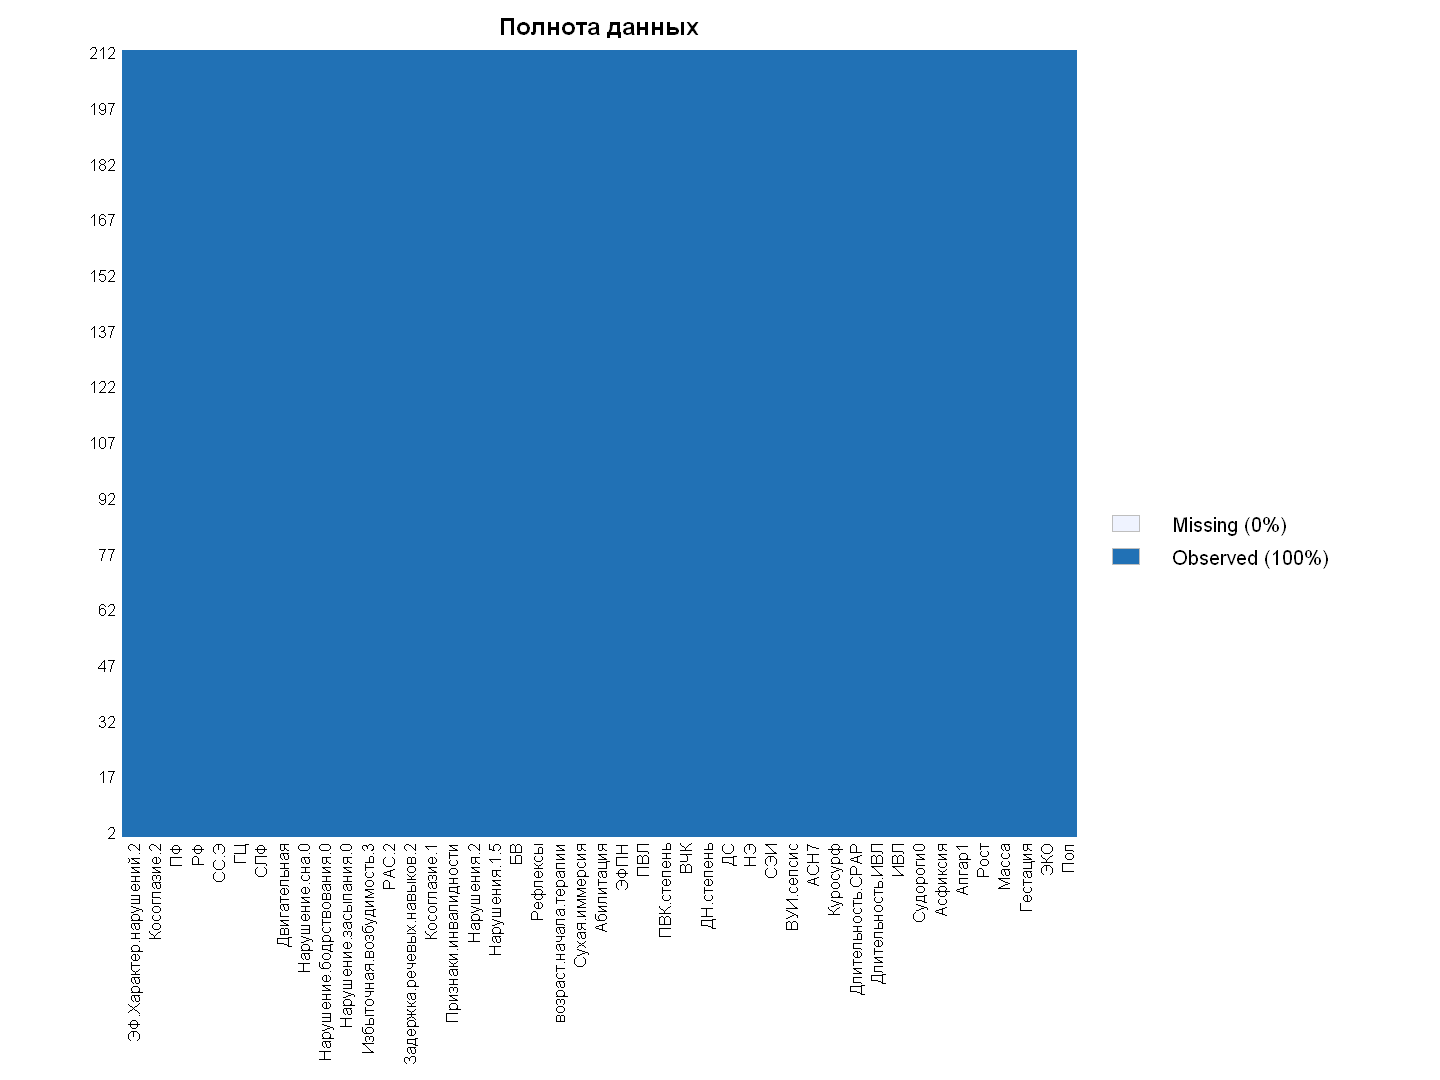

In [11]:
default.warn = getOption("warn")
options(warn = -1)
missmap(prem, main = "Полнота данных", gap.xaxis = 0, margins = c(10, 5))
options(warn = default.warn)

In [12]:
as.data.frame(sapply(train, function(x) sum(is.na(x))))

Warning message in is.na(x):
"is.na() применен к не-списку/вектору типа 'symbol'"
Warning message in is.na(x):
"is.na() применен к не-списку/вектору типа 'symbol'"
Warning message in is.na(x):
"is.na() применен к не-списку/вектору типа 'language'"


,"sapply(train, function(x) sum(is.na(x)))"
,<int>
x,0
...,0
,0


Преобразованіе к численным значениям

In [13]:
prem.num = prem
prem.num$Пол = as.integer(prem.num$Пол) - 1
prem.num$ЭКО = as.integer(prem.num$ЭКО) - 1
prem.num$Гестация = as.integer(prem.num$Гестация) - 1
prem.num$Апгар1 = as.integer(prem.num$Апгар1) - 1
prem.num$Асфиксия = as.integer(prem.num$Асфиксия) - 1
prem.num$Судороги0 = as.integer(prem.num$Судороги0) - 1
prem.num$ИВЛ = as.integer(prem.num$ИВЛ) - 1
prem.num$Куросурф = as.integer(prem.num$Куросурф) - 1
prem.num$АСН7 = as.integer(prem.num$АСН7) - 1
prem.num$ВУИ.сепсис = as.integer(prem.num$ВУИ.сепсис) - 1
prem.num$СЭИ = as.integer(prem.num$СЭИ) - 1
prem.num$НЭ = as.integer(prem.num$НЭ) - 1
prem.num$ДС = as.integer(prem.num$ДС) - 1
prem.num$ДН.степень = as.integer(prem.num$ДН.степень) - 1
prem.num$ВЧК = as.integer(prem.num$ВЧК) - 1
prem.num$ПВК.степень = as.integer(prem.num$ПВК.степень) - 1
prem.num$ПВЛ = as.integer(prem.num$ПВЛ) - 1
prem.num$ЭФПН = as.integer(prem.num$ЭФПН) - 1
prem.num$Абилитация = as.integer(prem.num$Абилитация) - 1
prem.num$Сухая.иммерсия = as.integer(prem.num$Сухая.иммерсия) - 1
prem.num$возраст.начала.терапии = as.integer(prem.num$возраст.начала.терапии) - 1
prem.num$Рефлексы = as.integer(prem.num$Рефлексы) - 1
prem.num$БВ = as.integer(prem.num$БВ) - 1
prem.num$Нарушения.1.5 = as.integer(prem.num$Нарушения.1.5) - 1
prem.num$Нарушения.2 = as.integer(prem.num$Нарушения.2) - 1
prem.num$Признаки.инвалидности = as.integer(prem.num$Признаки.инвалидности) - 1
prem.num$Косоглазие.1 = as.integer(prem.num$Косоглазие.1) - 1
prem.num$Задержка.речевых.навыков.2 = as.integer(prem.num$Задержка.речевых.навыков.2) - 1
prem.num$РАС.2 = as.integer(prem.num$РАС.2) - 1
prem.num$Избыточная.возбудимость.3 = as.integer(prem.num$Избыточная.возбудимость.3) - 1
prem.num$Нарушение.засыпания.0 = as.integer(prem.num$Нарушение.засыпания.0) - 1
prem.num$Нарушение.бодрствования.0 = as.integer(prem.num$Нарушение.бодрствования.0) - 1
prem.num$Нарушение.сна.0 = as.integer(prem.num$Нарушение.сна.0) - 1
prem.num$Двигательная = as.integer(prem.num$Двигательная) - 1
prem.num$СЛФ = as.integer(prem.num$СЛФ) - 1
prem.num$ГЦ = as.integer(prem.num$ГЦ) - 1
prem.num$СС.Э = as.integer(prem.num$СС.Э) - 1
prem.num$РФ = as.integer(prem.num$РФ) - 1
prem.num$ПФ = as.integer(prem.num$ПФ) - 1
prem.num$Косоглазие.2 = as.integer(prem.num$Косоглазие.2) - 1
prem.num$ЭФ.Характер.нарушений.2 = as.integer(prem.num$ЭФ.Характер.нарушений.2) - 1

prem.num$ИВЛ1 = cut(Длительность.ИВЛ, c(0, 1, 7, 14, 21, 30, 66), include.lowest=T, right=F)
prem.num$ИВЛ1 = as.integer(prem.num$ИВЛ1) - 1

summary(prem.num)

default.warn = getOption("warn")
options(warn = -1)
#chart.Correlation(prem.num, method="spearman", histogram=TRUE, pch=16)
options(warn = default.warn)

      Пол              ЭКО            Гестация       Масса          
 Min.   :0.0000   Min.   :0.0000   Min.   :0.00   Length:212        
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.00   Class :character  
 Median :1.0000   Median :0.0000   Median :2.00   Mode  :character  
 Mean   :0.5425   Mean   :0.1604   Mean   :1.75                     
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:3.00                     
 Max.   :1.0000   Max.   :1.0000   Max.   :3.00                     
     Рост               Апгар1         Асфиксия        Судороги0     
 Length:212         Min.   :0.000   Min.   :0.0000   Min.   :0.0000  
 Class :character   1st Qu.:3.000   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Median :5.000   Median :1.0000   Median :0.0000  
                    Mean   :4.151   Mean   :0.6368   Mean   :0.4481  
                    3rd Qu.:5.000   3rd Qu.:1.0000   3rd Qu.:1.0000  
                    Max.   :5.000   Max.   :1.0000   Max.   :2.0000  
      ИВЛ         Длительно

### Мозаики

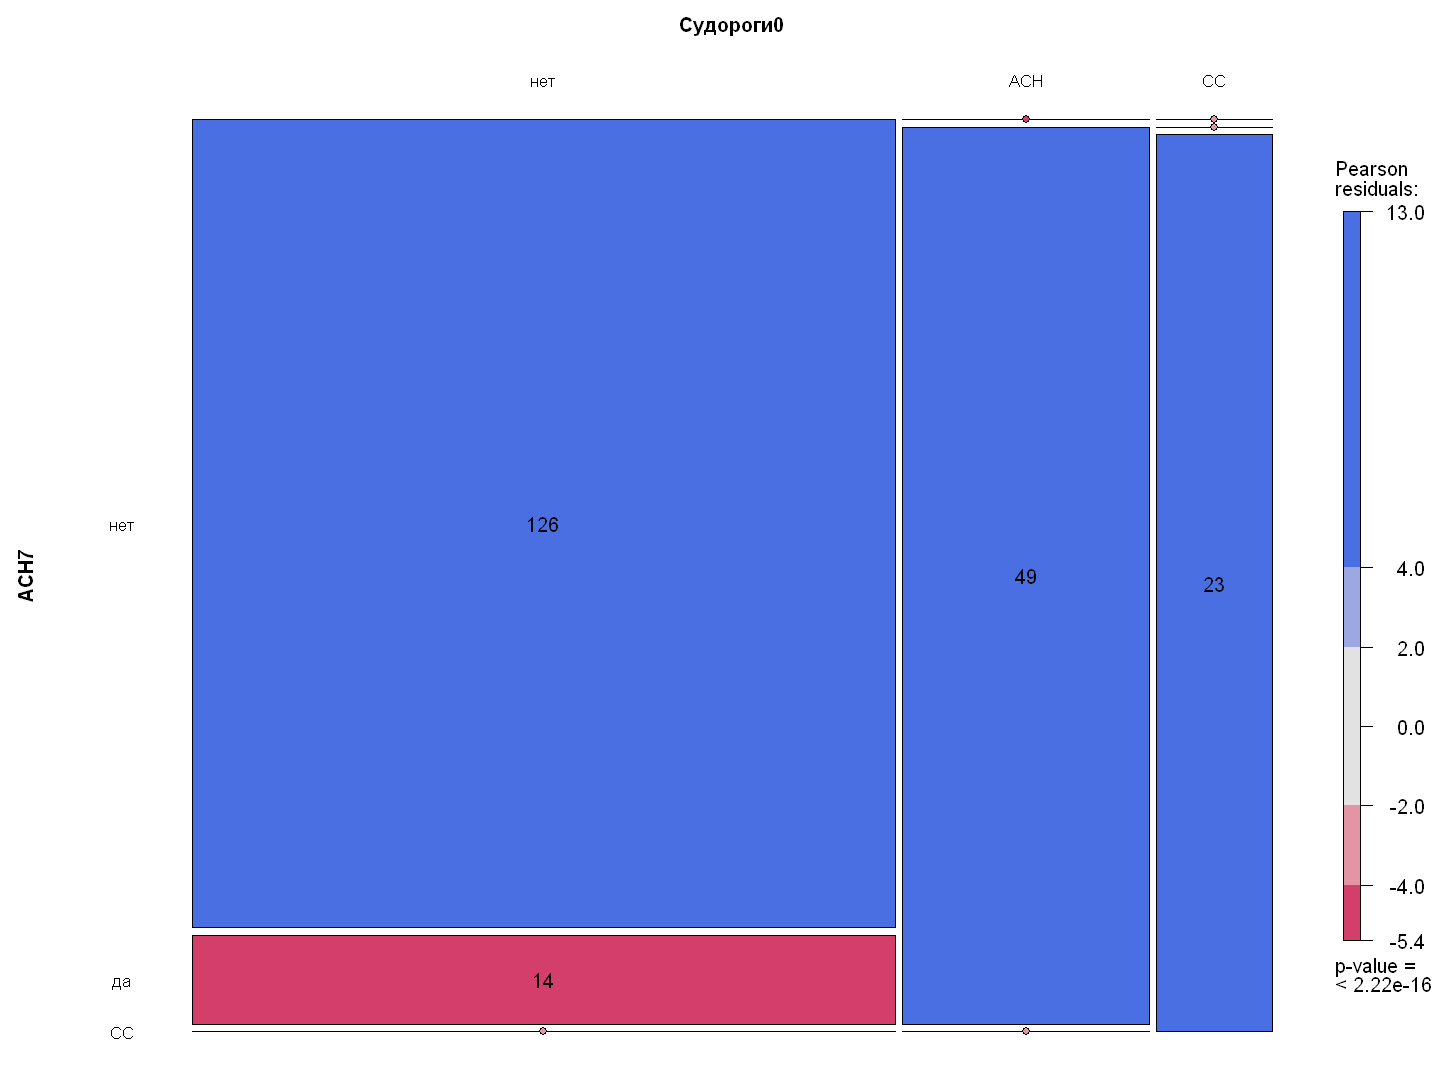

In [14]:
mosaic(~Судороги0 + АСН7
       , shade=TRUE
       , gp_labels=gpar(fontsize=10)
       , keep_aspect_ratio=FALSE
       , split_vertical=TRUE
       , labeling=labeling_values
       , offset_varnames=c(left=5, top=2)
       , offset_labels=c(left=2.5, top=1)
       , rot_labels=c(left=0, top=0)
       , margins=c(5,2,2,8)
       , labeling_args=list(set_varnames=c(Судороги="ПС в раннем неотанальном периоде", АСН="ПС в неотанальном периоде"))
      )

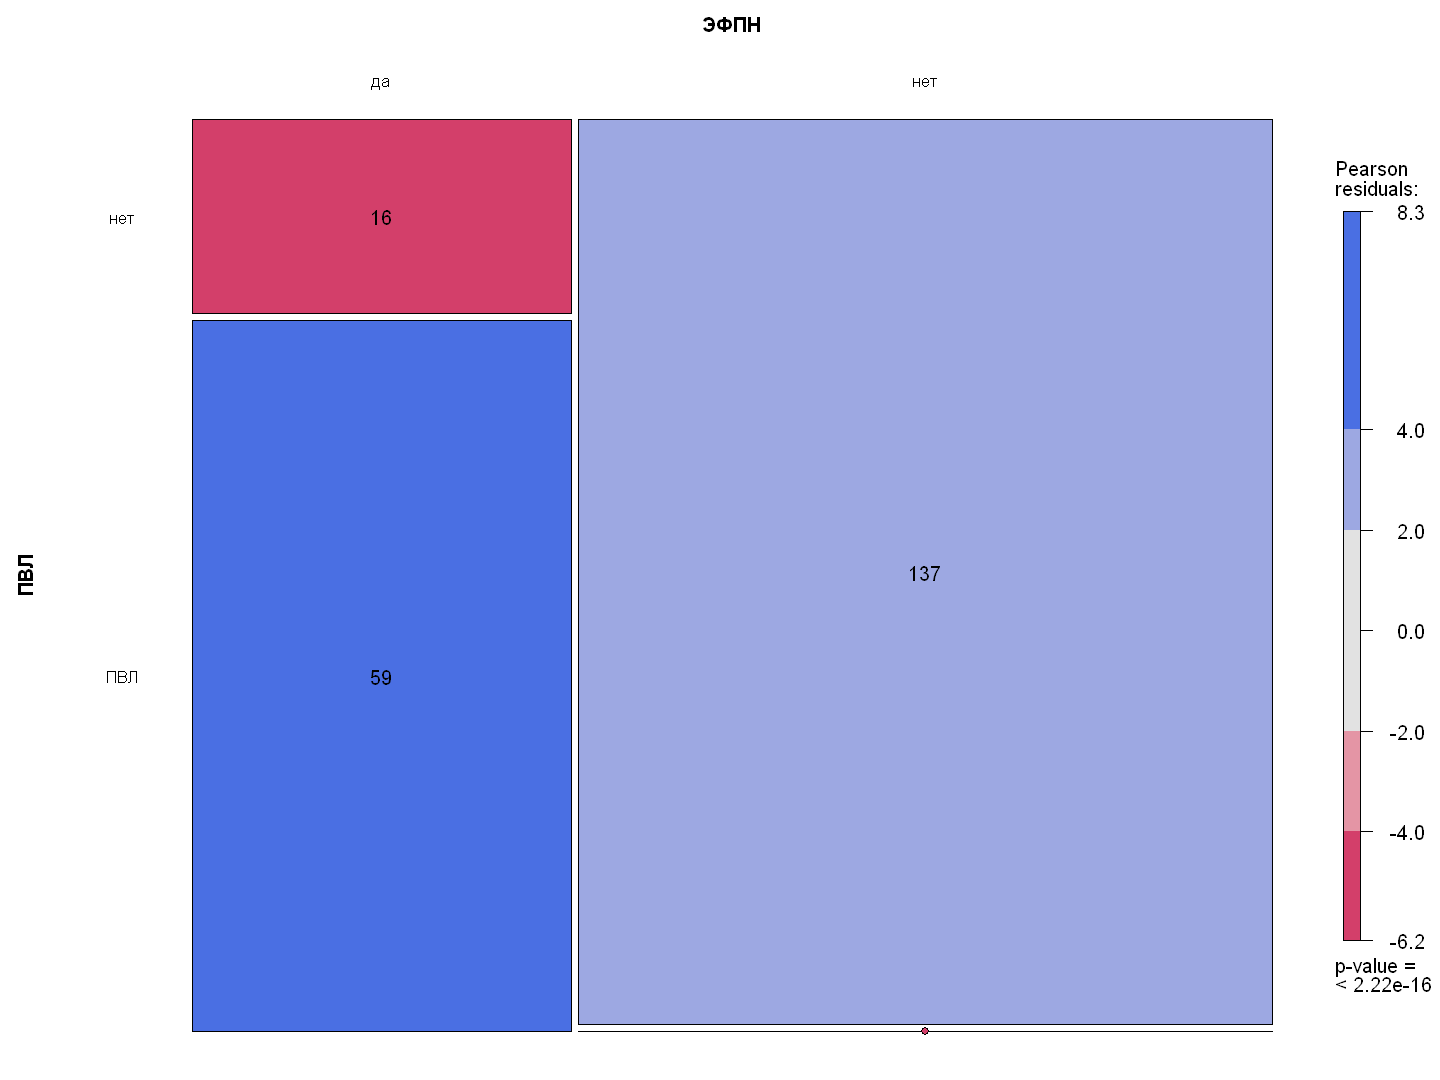

In [15]:
mosaic(~ЭФПН + ПВЛ
       , shade=TRUE
       , gp_labels=gpar(fontsize=10)
       , keep_aspect_ratio=FALSE
       , split_vertical=TRUE
       , labeling=labeling_values
       , offset_varnames=c(left=5, top=2)
       , offset_labels=c(left=2.5, top=1)
       , rot_labels=c(left=0, top=0)
       , margins=c(5,2,2,8)
       , labeling_args=list(set_varnames=c(Судороги="ПС в раннем неотанальном периоде", АСН="ПС в неотанальном периоде"))
      )

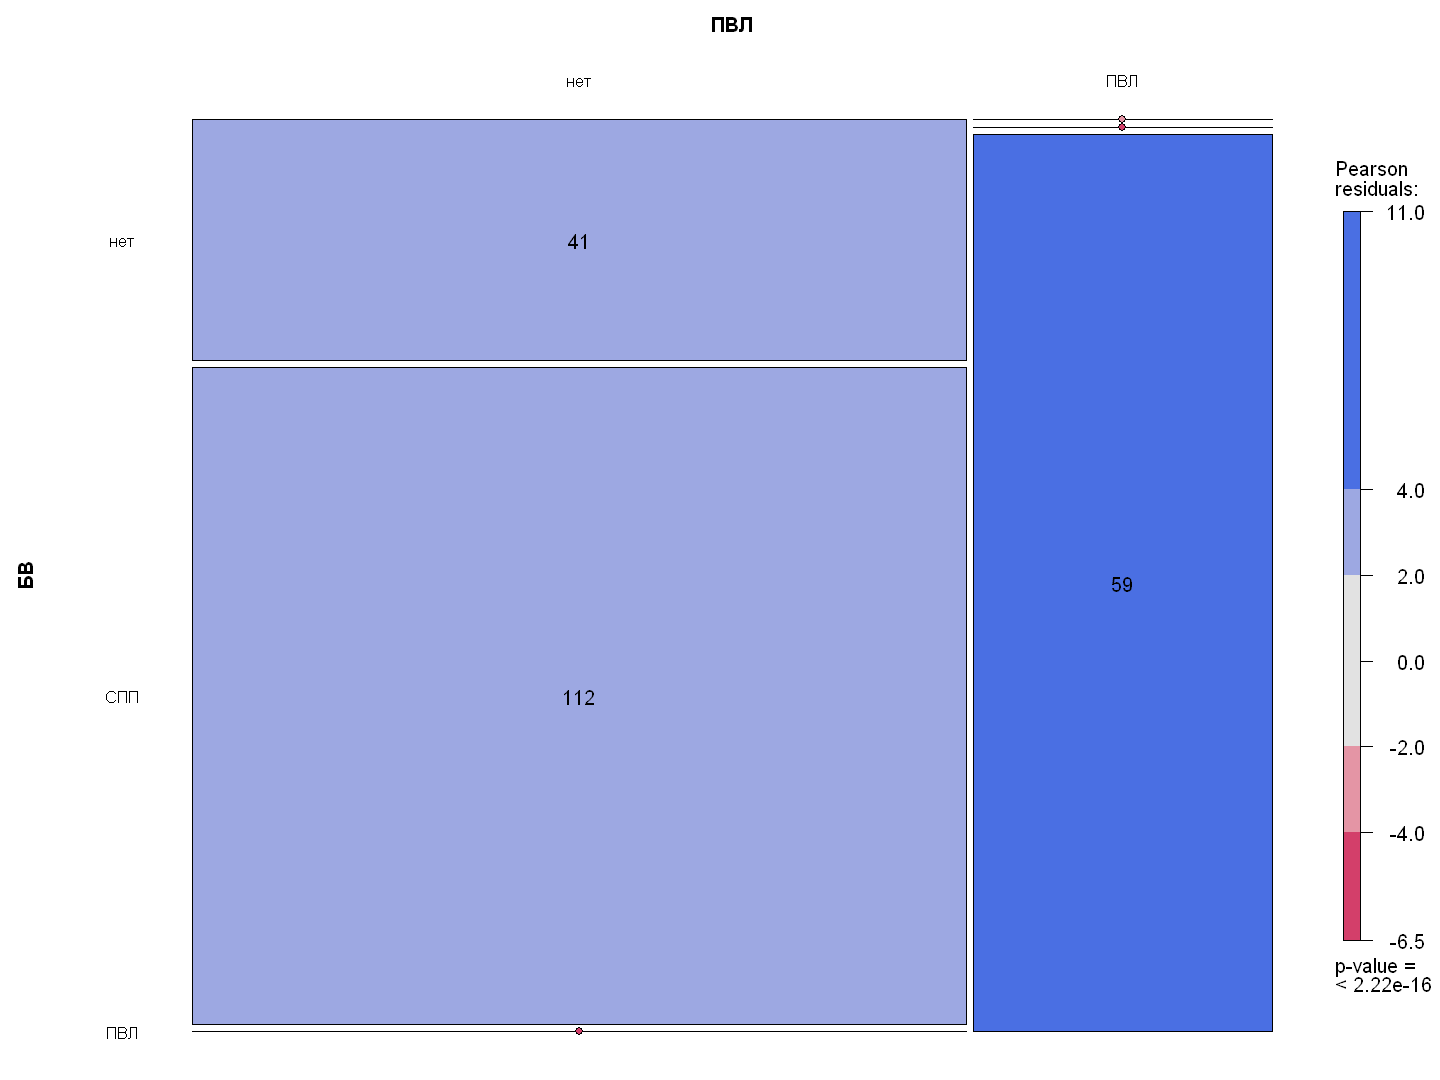

In [16]:
mosaic(~ПВЛ + БВ
       , shade=TRUE
       , gp_labels=gpar(fontsize=10)
       , keep_aspect_ratio=FALSE
       , split_vertical=TRUE
       , labeling=labeling_values
       , offset_varnames=c(left=5, top=2)
       , offset_labels=c(left=2.5, top=1)
       , rot_labels=c(left=0, top=0)
       , margins=c(5,2,2,8)
       , labeling_args=list(set_varnames=c(Судороги="ПС в раннем неотанальном периоде", АСН="ПС в неотанальном периоде"))
      )

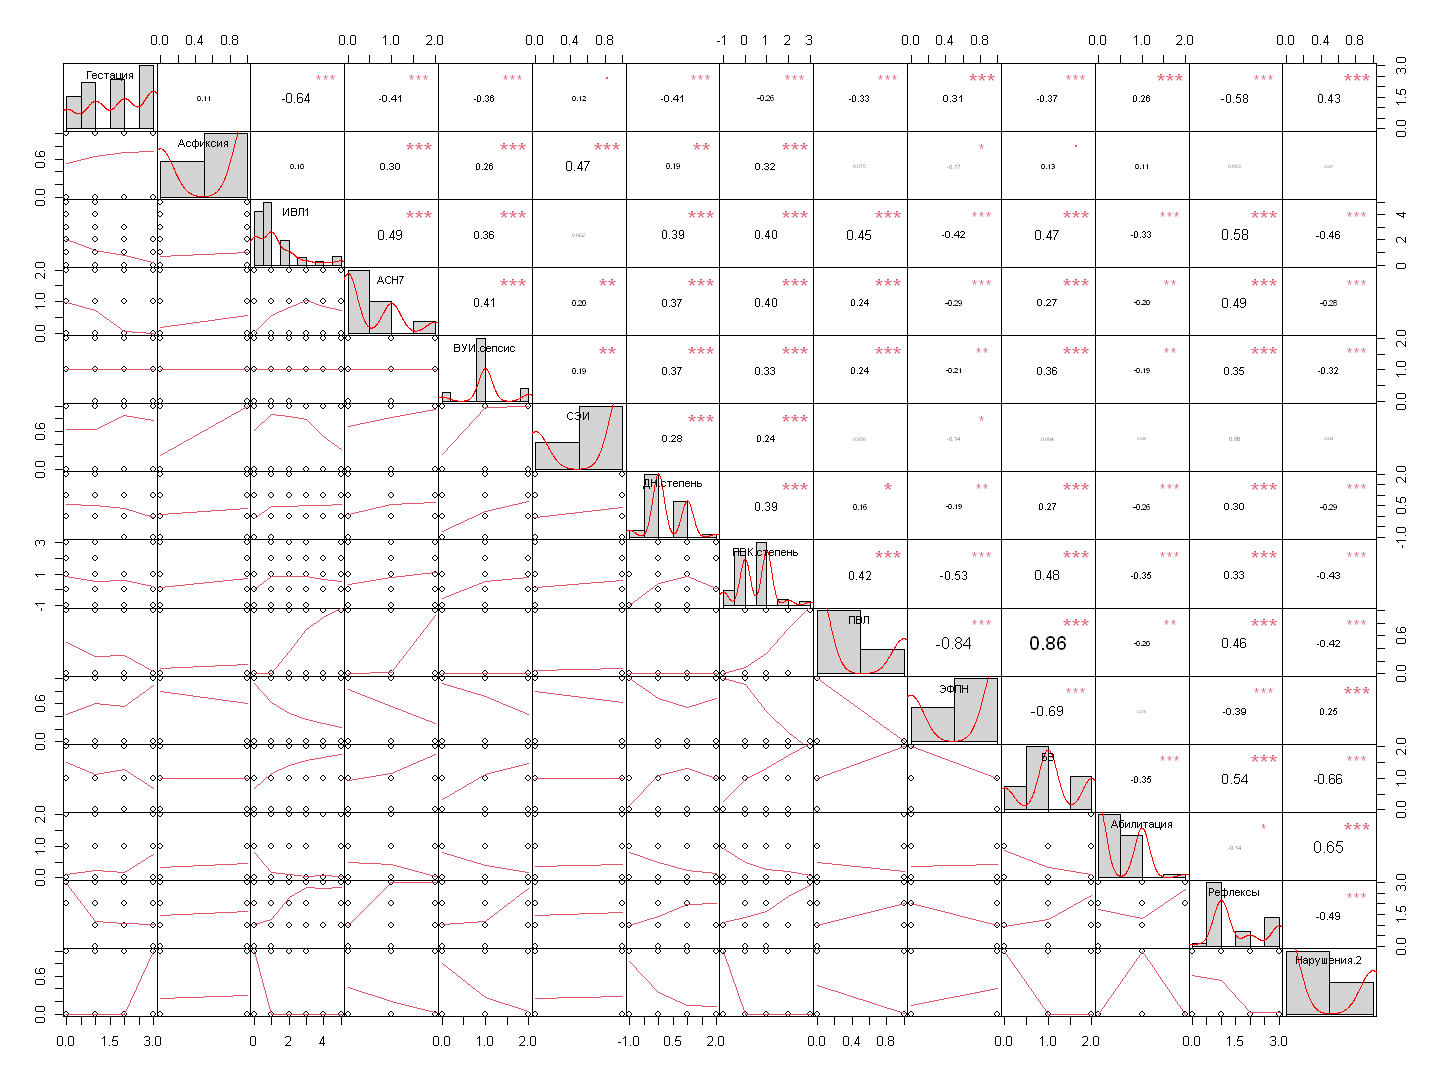

In [17]:
prem2.num = prem.num[, c("Гестация", "Асфиксия", "ИВЛ1", "АСН7", "ВУИ.сепсис", "СЭИ", "ДН.степень", "ПВК.степень"
                          , "ПВЛ", "ЭФПН", "БВ", "Абилитация", "Рефлексы", "Нарушения.2")
                     ]

default.warn = getOption("warn")
options(warn = -1)
chart.Correlation(prem2.num, method="spearman", histogram=TRUE, pch=16)
options(warn = default.warn)

In [18]:
default.warn = getOption("warn")
options(warn = -1)
print(corr.test(prem2.num, use="pairwise", method="spearman", adjust="none", alpha=.05), short=FALSE)
options(warn = default.warn)

Call:corr.test(x = prem2.num, use = "pairwise", method = "spearman", 
    adjust = "none", alpha = 0.05)
Correlation matrix 
            Гестация Асфиксия  ИВЛ1  АСН7 ВУИ.сепсис   СЭИ ДН.степень
Гестация        1.00     0.11 -0.64 -0.41      -0.36  0.12      -0.41
Асфиксия        0.11     1.00  0.10  0.30       0.26  0.47       0.19
ИВЛ1           -0.64     0.10  1.00  0.49       0.36  0.06       0.39
АСН7           -0.41     0.30  0.49  1.00       0.41  0.20       0.37
ВУИ.сепсис     -0.36     0.26  0.36  0.41       1.00  0.19       0.37
СЭИ             0.12     0.47  0.06  0.20       0.19  1.00       0.28
ДН.степень     -0.41     0.19  0.39  0.37       0.37  0.28       1.00
ПВК.степень    -0.26     0.32  0.40  0.40       0.33  0.24       0.39
ПВЛ            -0.33     0.08  0.45  0.24       0.24  0.06       0.16
ЭФПН            0.31    -0.17 -0.42 -0.29      -0.21 -0.14      -0.19
БВ             -0.37     0.13  0.47  0.27       0.36  0.09       0.27
Абилитация      0.26     0.11 -0.33

## Транформация данных

ИВЛ разбиваем на периоды (полных суток):
* до суток
* 1-6 суток (до недели)
* 7-13 суток (2 недели)
* 14-20 суток (3 недели)
* до 30 суток (1 мес)
* больше 1 месяца (максимальное значение -- 66)

In [19]:
prem$ИВЛ1 = cut(Длительность.ИВЛ, c(0, 1, 7, 14, 21, 30, 66), include.lowest=T, right=F)
levels(prem$ИВЛ1)[1] = "нет"

Степень ДН

In [20]:
prem$ДН.степень = factor(prem$ДН.степень)
levels(prem$ДН.степень)[1] = "нет"

Абилитация

In [21]:
# levels(prem$Абилитация)[3] = 'да'
# levels(prem$Абилитация)

Непустые данные

In [22]:
prem.omit = dplyr::select(prem, Гестация, Асфиксия, ИВЛ1, АСН7, ВУИ.сепсис, СЭИ, ДН.степень, ПВК.степень
                           , БВ, Абилитация, Рефлексы, Нарушения.2
                          )
prem = prem[, c("Гестация", "Асфиксия", "ИВЛ1", "АСН7", "ВУИ.сепсис", "СЭИ", "ДН.степень", "ПВК.степень"
                , "ЭФПН", "БВ", "Абилитация", "Рефлексы", "Нарушения.2"
               )
           ]
summary(prem)

     Гестация  Асфиксия       ИВЛ1     АСН7           ВУИ.сепсис   СЭИ     
 [22; 28]:36   нет: 77   нет    :71   нет:126   нет        : 21   нет: 63  
 (28; 31]:51   да :135   [1,7)  :83   да : 63   ВУИ        :158   да :149  
 (31; 33]:55             [7,14) :32   СС : 23   ВУИ, сепсис: 33            
 (33; 36]:70             [14,21):10                                        
                         [21,30): 5                                        
                         [30,66]:11                                        
 ДН.степень ПВК.степень         ЭФПН       БВ          Абилитация 
 нет: 14    Length:212         да : 75   нет: 41   нет      :123  
 1  :122    Class :character   нет:137   СПП:112   да       : 83  
 2  : 70    Mode  :character             ПВЛ: 59   после ПВЛ:  6  
 3  :  6                                                          
                                                                  
                                                                  

In [23]:
names(prem)[names(prem) == "Нарушения.2"] = "Нарушения"
names(prem.num)[names(prem.num) == "Нарушения.2"] = "Нарушения"
names(prem.omit)[names(prem.omit) == "Нарушения.2"] = "Нарушения"

## Нарушения

### Определение обучающей и тестовой выборок  

In [24]:
set.seed(421)
test.proportion = 0.8
split = initial_split(prem, prop = test.proportion, strata = Нарушения)
train = split %>% 
        training()
test = split %>% 
        testing()

In [81]:
levels(prem$"ВУИ.сепсис")

[1] "нет"         "ВУИ"         "ВУИ, сепсис"

### Пошаговая регрессия
Пошаговая регрессия генерирует лучший набор факторов, основываясь на величине Akaike Information Criterion (AIC) и их значимости

#### Нулевая и полная модели

Нулевая модель -- Нарушения ни от чего не зависят. 
* Данные -- prem.omit
* family -- binomial

In [25]:
model.null = glm(Нарушения ~ 1, data=prem, family = binomial(link="logit"))
summary(model.null)


Call:
glm(formula = Нарушения ~ 1, family = binomial(link = "logit"), 
    data = prem)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9031  -0.9031  -0.9031   1.4791   1.4791  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -0.6861     0.1455  -4.715 2.42e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 270.34  on 211  degrees of freedom
Residual deviance: 270.34  on 211  degrees of freedom
AIC: 272.34

Number of Fisher Scoring iterations: 4


Полная модель -- Нарушения зависит от всех переменных

In [26]:
model.full = glm(Нарушения ~ ., data=prem, family = binomial(link="logit"))
summary(model.full)

Warning message:
"glm.fit: алгоритм не сошелся"
Warning message:
"glm.fit: возникли подогнанные вероятности 0 или 1"



Call:
glm(formula = Нарушения ~ ., family = binomial(link = "logit"), 
    data = prem)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.383e-05  -2.100e-08  -2.100e-08   2.100e-08   5.114e-05  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)             -150.326 403961.828   0.000    1.000
Гестация(28; 31]           3.317 103747.743   0.000    1.000
Гестация(31; 33]          43.960 116850.857   0.000    1.000
Гестация(33; 36]          15.697 136319.399   0.000    1.000
Асфиксияда                12.594  77982.603   0.000    1.000
ИВЛ1[1,7)                -42.697  38810.887  -0.001    0.999
ИВЛ1[7,14)               -19.275  94950.822   0.000    1.000
ИВЛ1[14,21)              -55.022 171682.958   0.000    1.000
ИВЛ1[21,30)              -21.041 539662.862   0.000    1.000
ИВЛ1[30,66]              -82.597 137577.535  -0.001    1.000
АСН7да                    55.892  53161.272   0.001    0.999
АСН7СС              

In [27]:
anova(model.null, model.full)

,Resid. Df,Resid. Dev,Df,Deviance
,<dbl>,<dbl>,<dbl>,<dbl>
1,211,2.703417e+02,NA,NA
2,182,1.573963e-08,29,270.3417


#### Автоподбор (прямой)

In [28]:
default.warn = getOption("warn")
options(warn = -1)
step = stepAIC(model.full, direction='forward', trace=T)
options(warn = default.warn)

Start:  AIC=60
Нарушения ~ Гестация + Асфиксия + ИВЛ1 + 
    АСН7 + ВУИ.сепсис + СЭИ + ДН.степень + 
    ПВК.степень + ЭФПН + БВ + Абилитация + 
    Рефлексы



In [29]:
step$anova
step
summary(step)

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,1.573963e-08,60



Call:  glm(formula = Нарушения ~ Гестация + Асфиксия + 
    ИВЛ1 + АСН7 + ВУИ.сепсис + СЭИ + ДН.степень + 
    ПВК.степень + ЭФПН + БВ + Абилитация + 
    Рефлексы, family = binomial(link = "logit"), data = prem)

Coefficients:
          (Intercept)       Гестация(28; 31]       Гестация(31; 33]  
             -150.326                  3.317                 43.960  
     Гестация(33; 36]             Асфиксияда              ИВЛ1[1,7)  
               15.697                 12.594                -42.697  
           ИВЛ1[7,14)            ИВЛ1[14,21)            ИВЛ1[21,30)  
              -19.275                -55.022                -21.041  
          ИВЛ1[30,66]                 АСН7да                 АСН7СС  
              -82.597                 55.892                 57.331  
        ВУИ.сепсисВУИ  ВУИ.сепсисВУИ, сепсис                  СЭИда  
              -12.622                 10.354                -18.010  
          ДН.степень1            ДН.степень2            ДН.степень3  
 


Call:
glm(formula = Нарушения ~ Гестация + Асфиксия + 
    ИВЛ1 + АСН7 + ВУИ.сепсис + СЭИ + ДН.степень + 
    ПВК.степень + ЭФПН + БВ + Абилитация + 
    Рефлексы, family = binomial(link = "logit"), data = prem)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-4.383e-05  -2.100e-08  -2.100e-08   2.100e-08   5.114e-05  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)             -150.326 403961.828   0.000    1.000
Гестация(28; 31]           3.317 103747.743   0.000    1.000
Гестация(31; 33]          43.960 116850.857   0.000    1.000
Гестация(33; 36]          15.697 136319.399   0.000    1.000
Асфиксияда                12.594  77982.603   0.000    1.000
ИВЛ1[1,7)                -42.697  38810.887  -0.001    0.999
ИВЛ1[7,14)               -19.275  94950.822   0.000    1.000
ИВЛ1[14,21)              -55.022 171682.958   0.000    1.000
ИВЛ1[21,30)              -21.041 539662.862   0.000    1.000
ИВЛ1[30,66]       

#### Автоподбор (обратный)

In [30]:
default.warn = getOption("warn")
options(warn = -1)
step = stepAIC(model.full, direction='backward', trace=T)
options(warn = default.warn)

Start:  AIC=60
Нарушения ~ Гестация + Асфиксия + ИВЛ1 + 
    АСН7 + ВУИ.сепсис + СЭИ + ДН.степень + 
    ПВК.степень + ЭФПН + БВ + Абилитация + 
    Рефлексы

              Df Deviance    AIC
- ИВЛ1         5    0.000 50.000
- ПВК.степень  4    0.000 52.000
- ДН.степень   3    0.000 54.000
- Гестация     3    0.000 54.000
- ВУИ.сепсис   2    0.000 56.000
- АСН7         2    0.000 56.000
- ЭФПН         1    0.000 58.000
- Асфиксия     1    0.000 58.000
- СЭИ          1    0.000 58.000
<none>              0.000 60.000
- Рефлексы     3   23.501 77.501
- БВ           2   38.787 94.787
- Абилитация   2   42.519 98.519

Step:  AIC=50
Нарушения ~ Гестация + Асфиксия + АСН7 + 
    ВУИ.сепсис + СЭИ + ДН.степень + ПВК.степень + 
    ЭФПН + БВ + Абилитация + Рефлексы

              Df Deviance     AIC
- ДН.степень   3    0.000  44.000
- Гестация     3    0.000  44.000
- ВУИ.сепсис   2    0.000  46.000
- АСН7         2    0.000  46.000
- ПВК.степень  4    5.545  47.545
- ЭФПН         1    0.000  4

In [31]:
step$anova
step
summary(step)

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,1.573963e-08,60
- ИВЛ1,5,1.208187e-08,187,2.782150e-08,50
- ДН.степень,3,2.366976e-09,190,3.018847e-08,44
- Гестация,3,4.283357e-08,193,7.302204e-08,38
- ВУИ.сепсис,2,1.109363e-08,195,8.411568e-08,34
- Асфиксия,1,1.184494e-09,196,8.293118e-08,32
- ЭФПН,1,7.157564e-09,197,9.008875e-08,30



Call:  glm(formula = Нарушения ~ АСН7 + СЭИ + ПВК.степень + 
    БВ + Абилитация + Рефлексы, family = binomial(link = "logit"), 
    data = prem)

Coefficients:
          (Intercept)                 АСН7да                 АСН7СС  
              200.755                 77.015                 75.609  
                СЭИда           ПВК.степень1           ПВК.степень2  
             -114.124                107.617                 -4.521  
         ПВК.степень3           ПВК.степень4                  БВСПП  
               64.592                334.101               -345.567  
                БВПВЛ           Абилитацияда    Абилитацияпосле ПВЛ  
             -420.368                344.919                262.515  
    Рефлексыповышеные        Рефлексывысокие  Рефлексыугнетение ЦНС  
              -60.588               -214.613               -251.575  

Degrees of Freedom: 211 Total (i.e. Null);  197 Residual
Null Deviance:	    270.3 
Residual Deviance: 9.009e-08 	AIC: 30


Call:
glm(formula = Нарушения ~ АСН7 + СЭИ + ПВК.степень + 
    БВ + Абилитация + Рефлексы, family = binomial(link = "logit"), 
    data = prem)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.260e-04  -2.100e-08  -2.100e-08   2.100e-08   1.495e-04  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)            2.008e+02  3.001e+07   0.000    1.000
АСН7да                 7.702e+01  1.491e+04   0.005    0.996
АСН7СС                 7.561e+01  4.453e+04   0.002    0.999
СЭИда                 -1.141e+02  1.936e+04  -0.006    0.995
ПВК.степень1           1.076e+02  1.021e+05   0.001    0.999
ПВК.степень2          -4.521e+00  1.003e+05   0.000    1.000
ПВК.степень3           6.459e+01  1.412e+05   0.000    1.000
ПВК.степень4           3.341e+02  1.326e+05   0.003    0.998
БВСПП                 -3.456e+02  5.870e+04  -0.006    0.995
БВПВЛ                 -4.204e+02  6.931e+04  -0.006    0.995
Абилитацияда           3

In [32]:
# default.warn = getOption("warn")
# options(warn = -1)
# model.step.aic = step(model.null
#                       , scope = list(lower=model.null, upper=model.full)
#                       , direction = "forward"
#                       , test = "Chisq"
#                       , data = prem
#                       , trace = 1
#                      )
# options(warn = default.warn)
# try(summary(model.step.aic))

#### Регрессия с лучшим подбором

In [33]:
require(leaps, quietly=TRUE);
require(bestglm, quietly=TRUE);

### Регрессия с определением параметров вручную

#### Модель

In [34]:
prem.model = glm(Нарушения ~ ., family=binomial(link='logit'), data=train)
summary(prem.model)

Warning message:
"glm.fit: алгоритм не сошелся"
Warning message:
"glm.fit: возникли подогнанные вероятности 0 или 1"



Call:
glm(formula = Нарушения ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-3.793e-05  -2.100e-08  -2.100e-08   2.100e-08   4.139e-05  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)
(Intercept)             -150.079 303815.580   0.000    1.000
Гестация(28; 31]           3.997 138462.394   0.000    1.000
Гестация(31; 33]          44.843  89426.161   0.001    1.000
Гестация(33; 36]          21.944 107887.899   0.000    1.000
Асфиксияда                17.593 133249.326   0.000    1.000
ИВЛ1[1,7)                -43.201  38161.015  -0.001    0.999
ИВЛ1[7,14)               -19.476 166663.533   0.000    1.000
ИВЛ1[14,21)              -46.661 181091.607   0.000    1.000
ИВЛ1[21,30)              -31.982 618978.324   0.000    1.000
ИВЛ1[30,66]              -87.486 169324.015  -0.001    1.000
АСН7да                    62.106  60302.617   0.001    0.999
АСН7СС             

##### Контрасты

In [35]:
sapply(train
       , function(x) 
           if (is.factor(x)) {
               contrasts(x) 
           } 
        )

$Гестация
         (28; 31] (31; 33] (33; 36]
[22; 28]        0        0        0
(28; 31]        1        0        0
(31; 33]        0        1        0
(33; 36]        0        0        1

$Асфиксия
    да
нет  0
да   1

$ИВЛ1
        [1,7) [7,14) [14,21) [21,30) [30,66]
нет         0      0       0       0       0
[1,7)       1      0       0       0       0
[7,14)      0      1       0       0       0
[14,21)     0      0       1       0       0
[21,30)     0      0       0       1       0
[30,66]     0      0       0       0       1

$АСН7
    да СС
нет  0  0
да   1  0
СС   0  1

$ВУИ.сепсис
            ВУИ ВУИ, сепсис
нет           0           0
ВУИ           1           0
ВУИ, сепсис   0           1

$СЭИ
    да
нет  0
да   1

$ДН.степень
    1 2 3
нет 0 0 0
1   1 0 0
2   0 1 0
3   0 0 1

$ПВК.степень
NULL

$ЭФПН
    нет
да    0
нет   1

$БВ
    СПП ПВЛ
нет   0   0
СПП   1   0
ПВЛ   0   1

$Абилитация
          да после ПВЛ
нет        0         0
да         1         0
после ПВЛ  0         1

$Рефлексы
              повышеные высокие угнетение ЦНС
соответствуют         0       0             0
повышеные             1       0             0
высокие               0       1             0
угнетение ЦНС         0       0             1

$Нарушения
    БНН
НН    0
БНН   1

#### Проверка модели

#### Метрики

##### McFadden

McFadden (величина > 0.4 является высокой и означает, что модель хорошо описывает данные и имеет высокую предсказательную мощность)

In [36]:
t(as.data.frame(pR2(prem.model)))

fitting null model for pseudo-r2


,llh,llhNull,G2,McFadden,r2ML,r2CU
pR2(prem.model),-5.992646e-09,-106.9344,213.8688,1,0.7200175,1


##### ViF

ViF (VIF > 5 как правило означает значительную мультиколинеарность, VIF > 10 указывает на сильную колинеарность предикторов)

In [37]:
vif(prem.model)

,GVIF,Df,GVIF^(1/(2*Df))
Гестация,1830.820892,3,3.497634
Асфиксия,71.264364,1,8.441822
ИВЛ1,3181.647752,5,2.240089
АСН7,80.649030,2,2.996745
ВУИ.сепсис,45.144139,2,2.592092
СЭИ,9.575216,1,3.094385
ДН.степень,96.651284,3,2.142239
ПВК.степень,118.539201,4,1.816489
ЭФПН,19.858504,1,4.456288
БВ,1000.041244,2,5.623471


#### Остатки

In [38]:
res.deviance = residuals(prem.model, type = "deviance")
res.pearson = residuals(prem.model, type = "pearson")

std.res.deviance = res.deviance/sqrt(1 - hatvalues(prem.model)) # standardized deviance residuals
std.res.pearson = res.pearson/sqrt(1 - hatvalues(prem.model)) # standardized pearson residuals

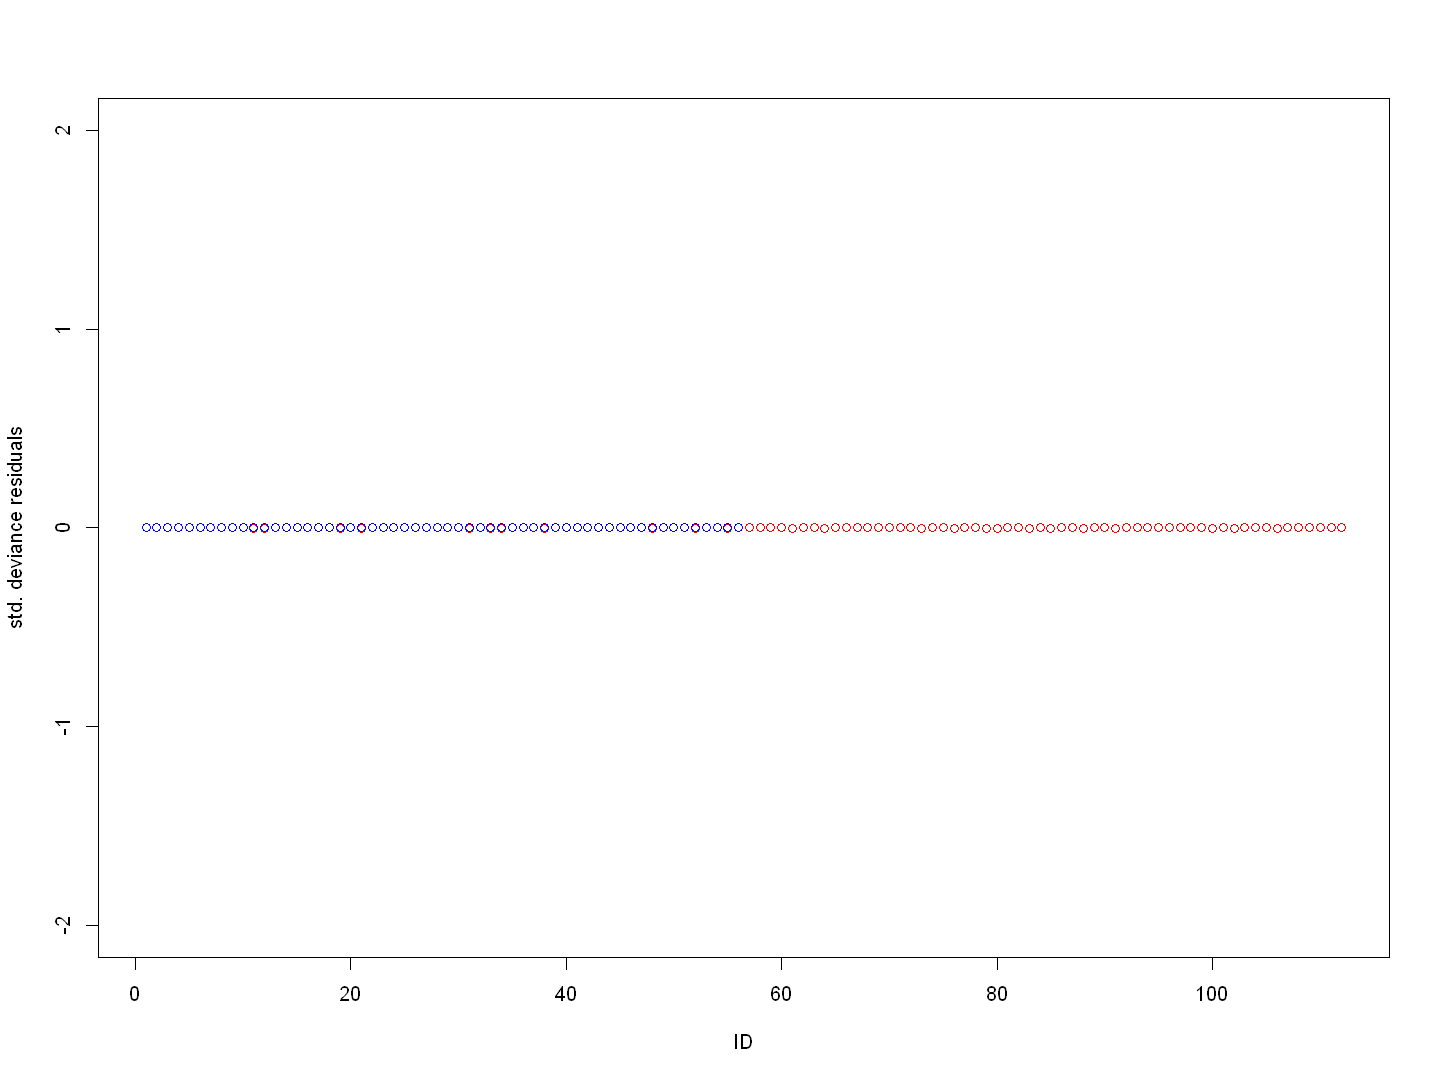

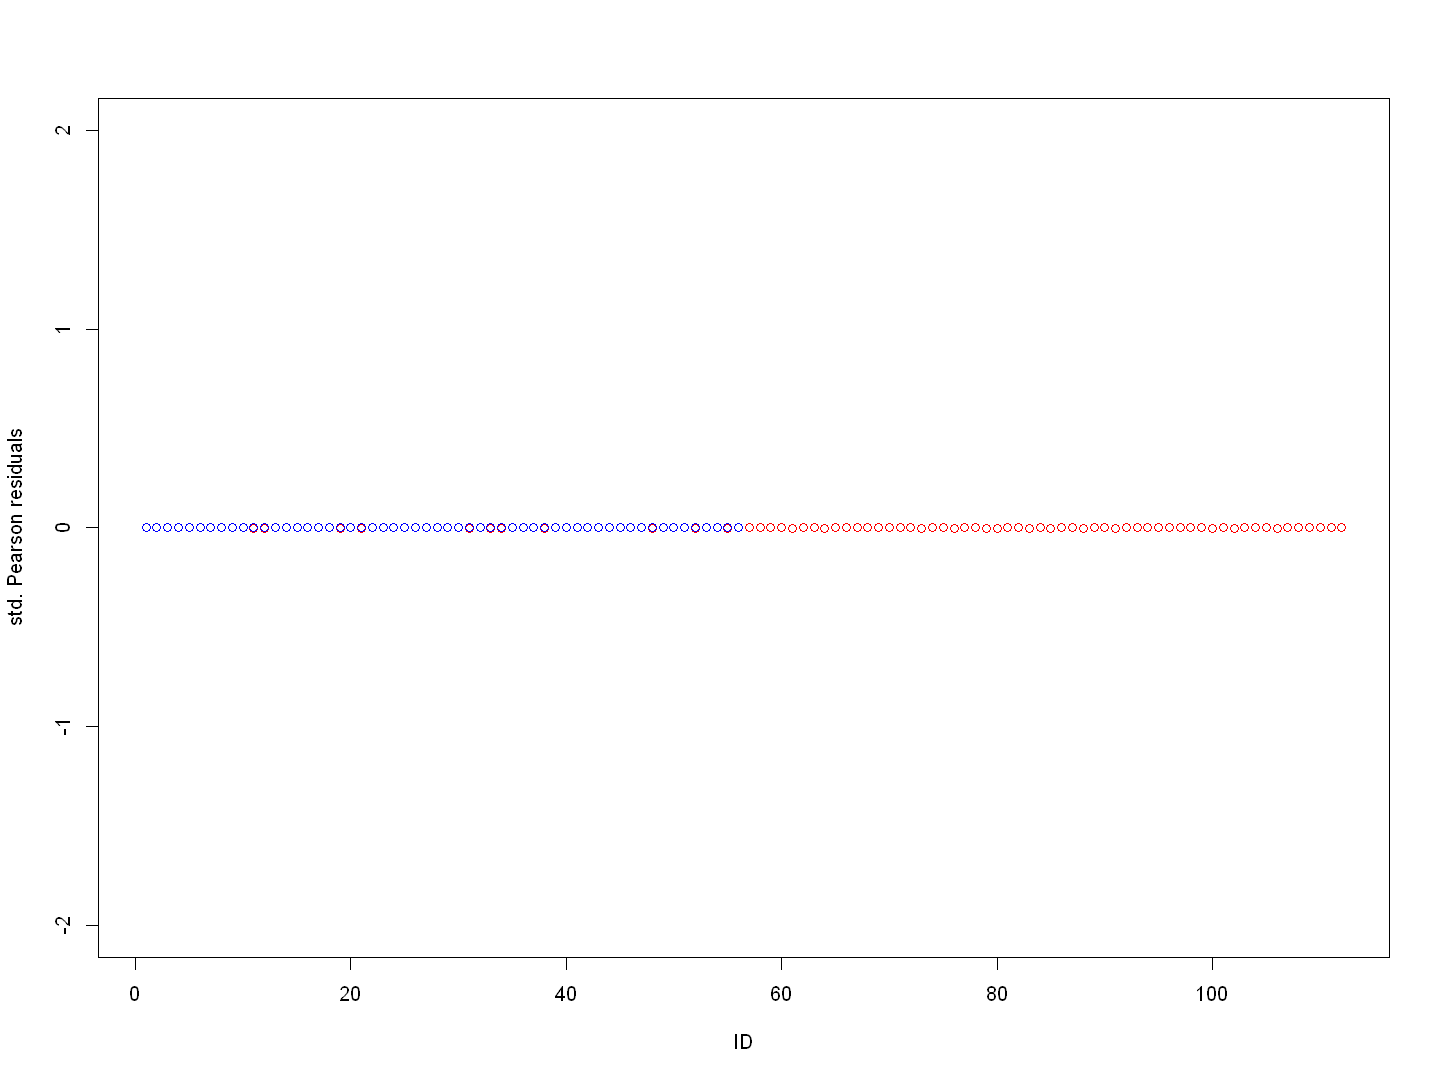

In [39]:
plot(res.deviance[prem.model$model$Нарушения=="НН"], col = "red", ylim = c(-2, 2), ylab = "std. deviance residuals", xlab = "ID")
points(res.pearson[prem.model$model$Нарушения=="БНН"], col = "blue")

plot(std.res.deviance[prem.model$model$Нарушения=="НН"], col = "red", ylim = c(-2, 2), ylab = "std. Pearson residuals", xlab = "ID")
points(std.res.pearson[prem.model$model$Нарушения=="БНН"], col = "blue")

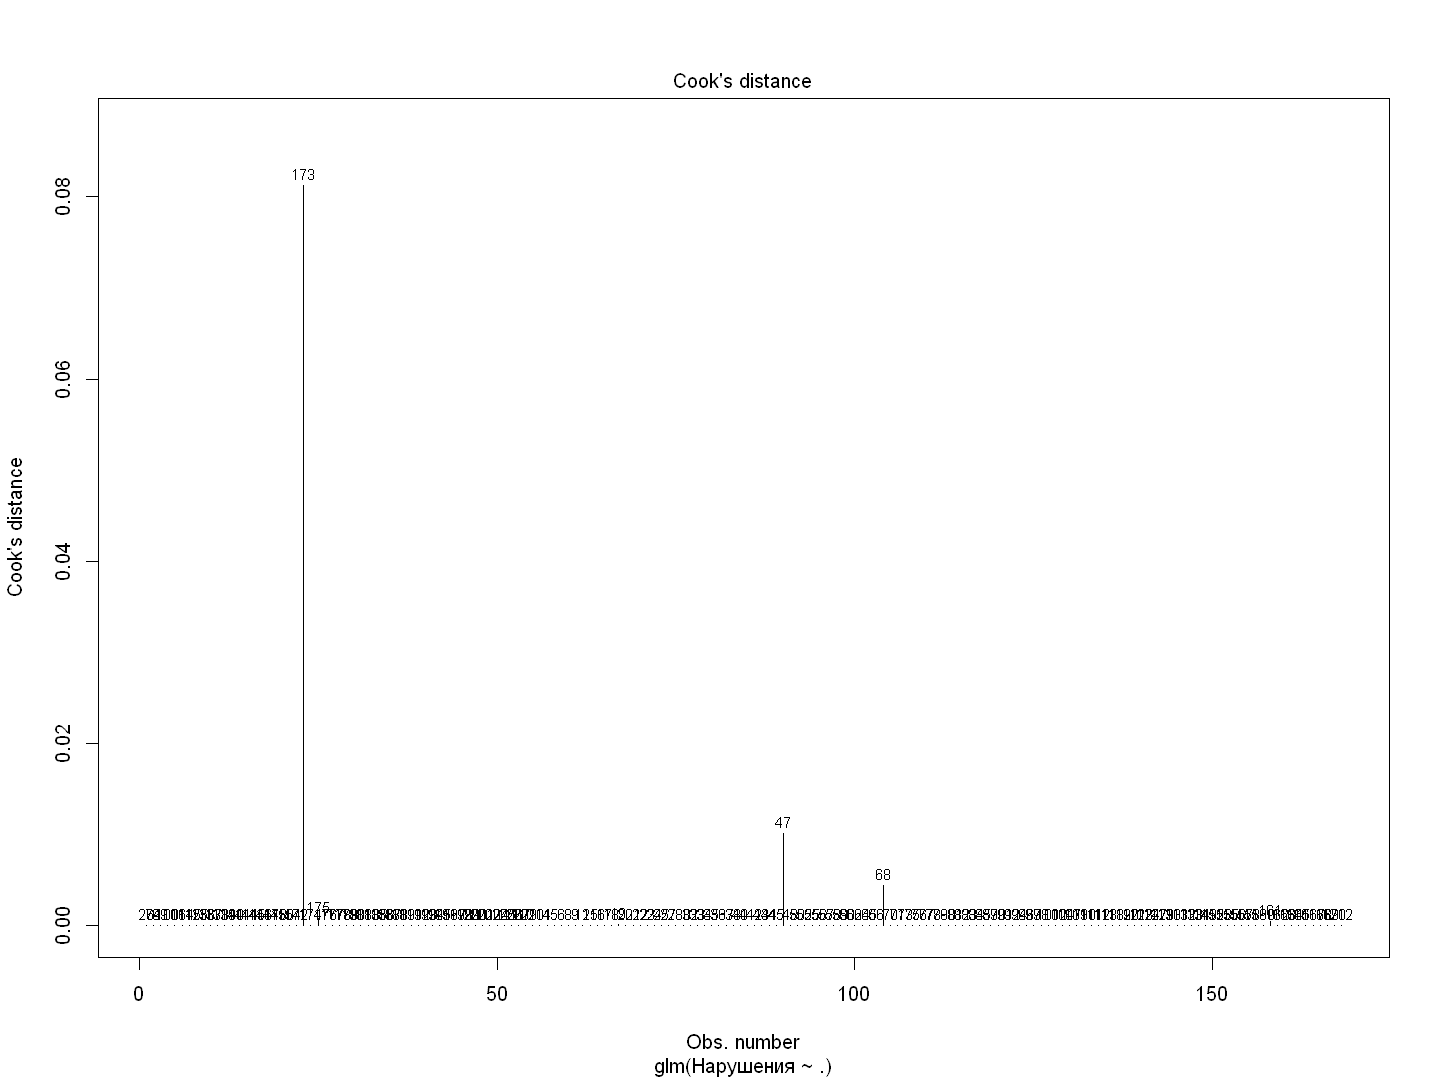

In [40]:
plot(prem.model, which = 4, id.n = dim(train)[1])

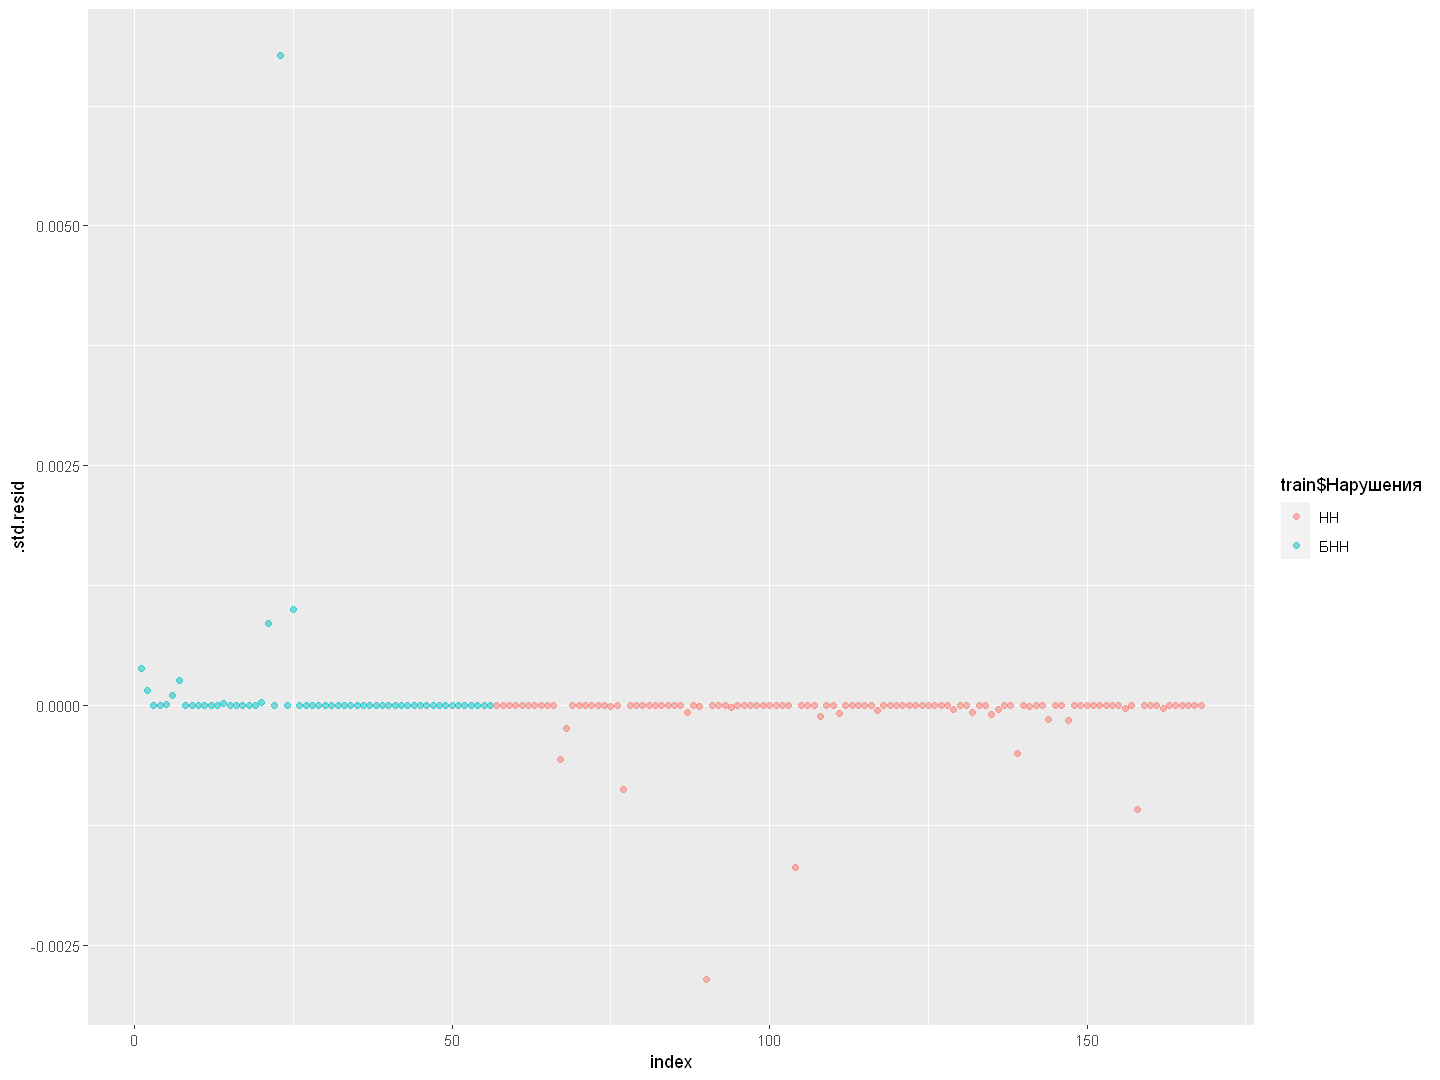

In [41]:
model_data = augment(prem.model) %>% 
    mutate(index = 1:n())
ggplot(model_data
       , aes(index, .std.resid, color = train$Нарушения)
      ) + 
    geom_point(alpha=0.5) 
# +
#     geom_hline(yintercept=0.005, linetype="dashed", color="blue")  + 
#     geom_hline(yintercept=-0.005, linetype="dashed", color="blue") 

#### Значимость переменных

In [42]:
varImp(prem.model)

,Overall
,<dbl>
Гестация(28; 31],2.886854e-05
Гестация(31; 33],5.014476e-04
Гестация(33; 36],2.033982e-04
Асфиксияда,1.320272e-04
"ИВЛ1[1,7)",1.132072e-03
"ИВЛ1[7,14)",1.168602e-04
"ИВЛ1[14,21)",2.576676e-04
"ИВЛ1[21,30)",5.166918e-05
"ИВЛ1[30,66]",5.166754e-04


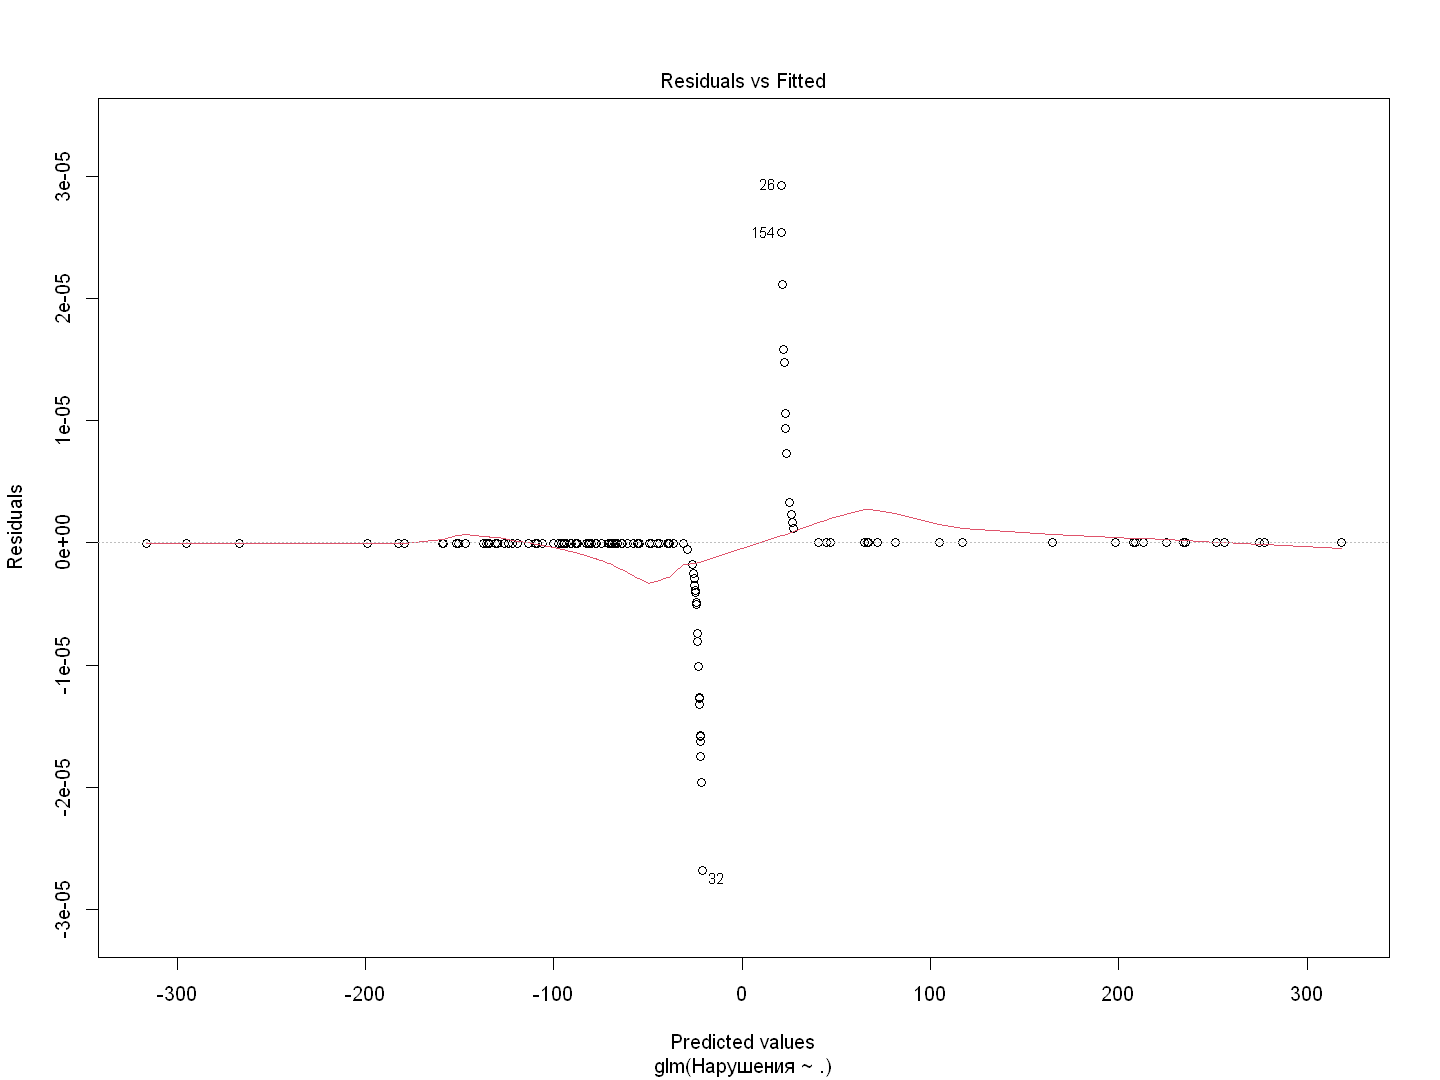

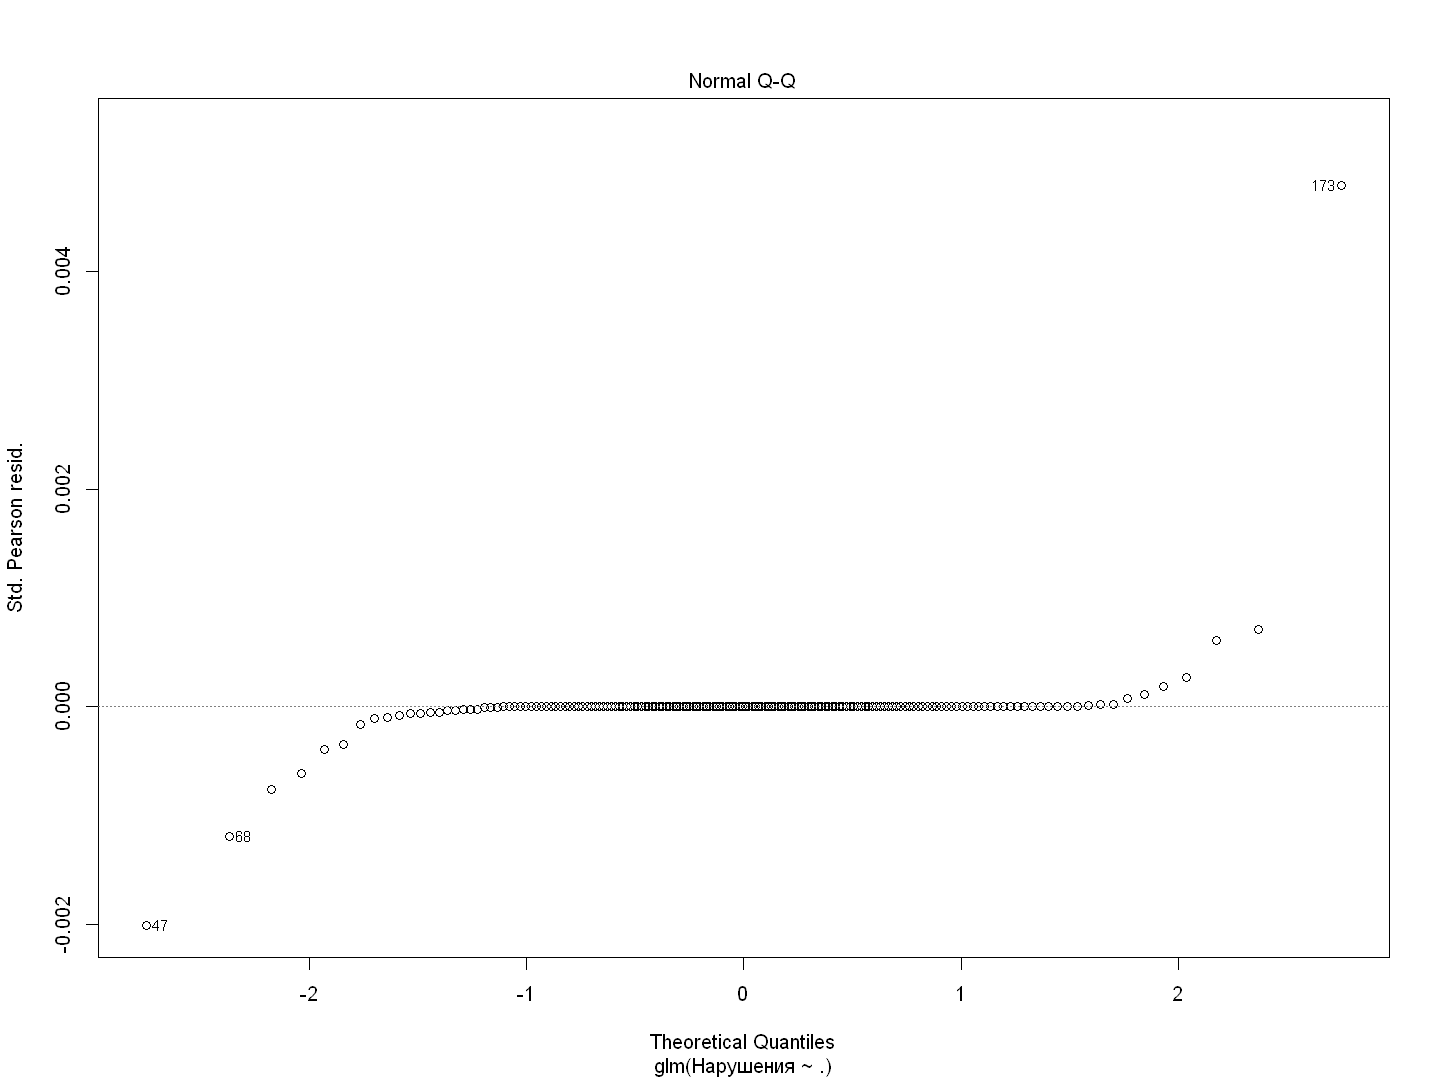

Warning message in sqrt(crit * p * (1 - hh)/hh):
"созданы NaN"
Warning message in sqrt(crit * p * (1 - hh)/hh):
"созданы NaN"


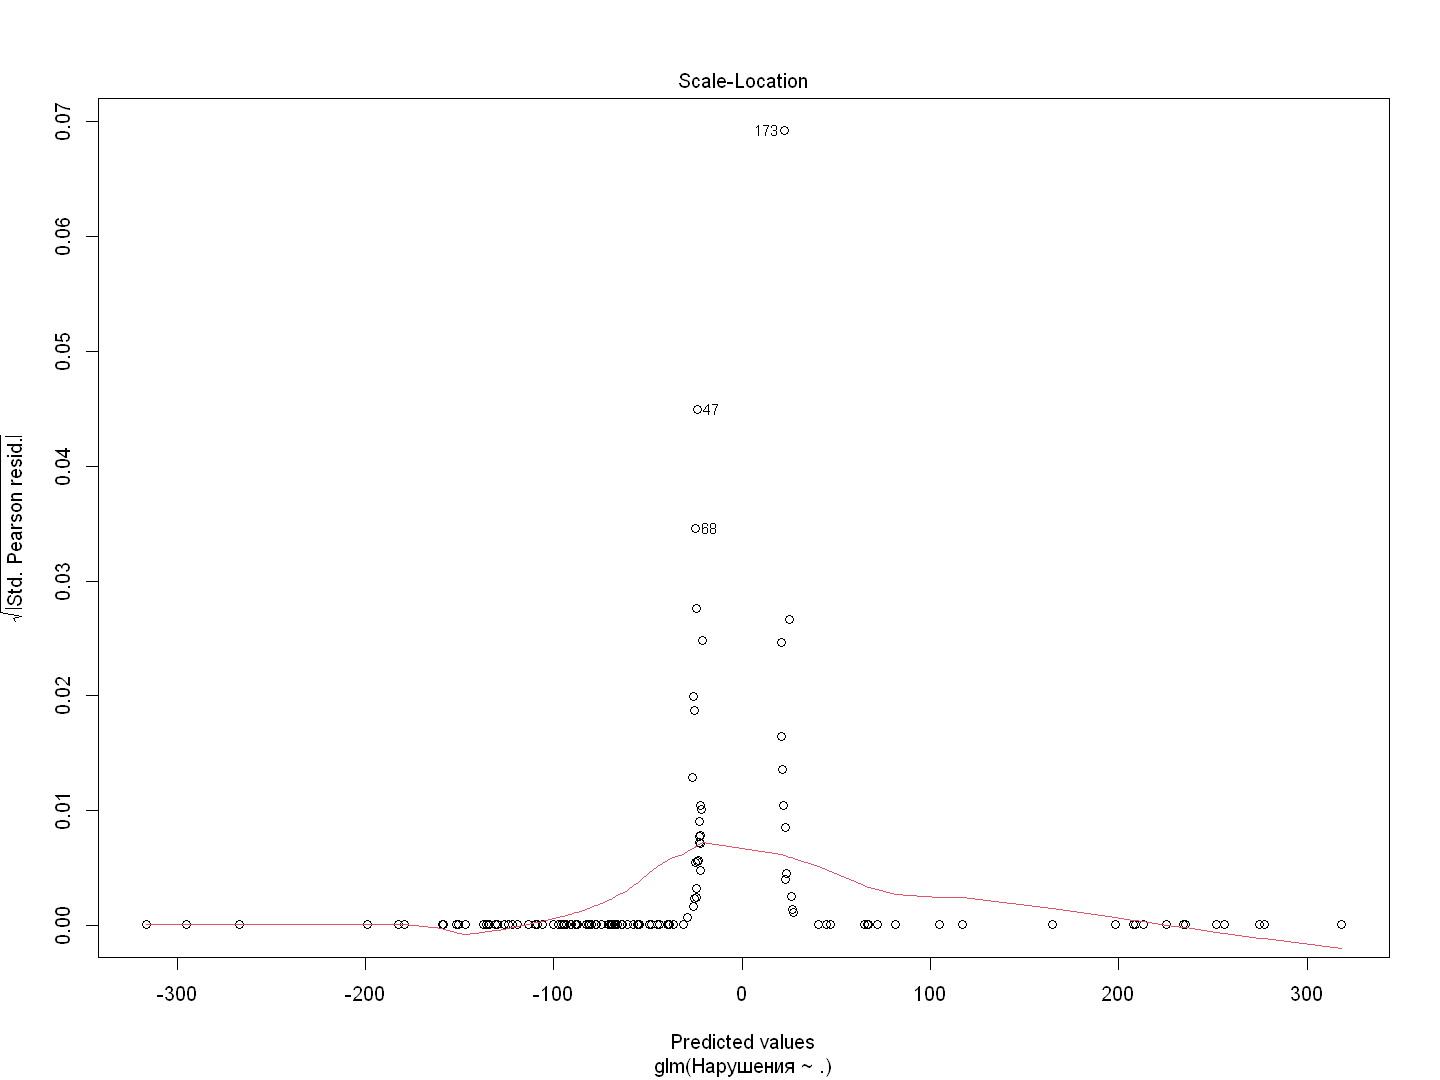

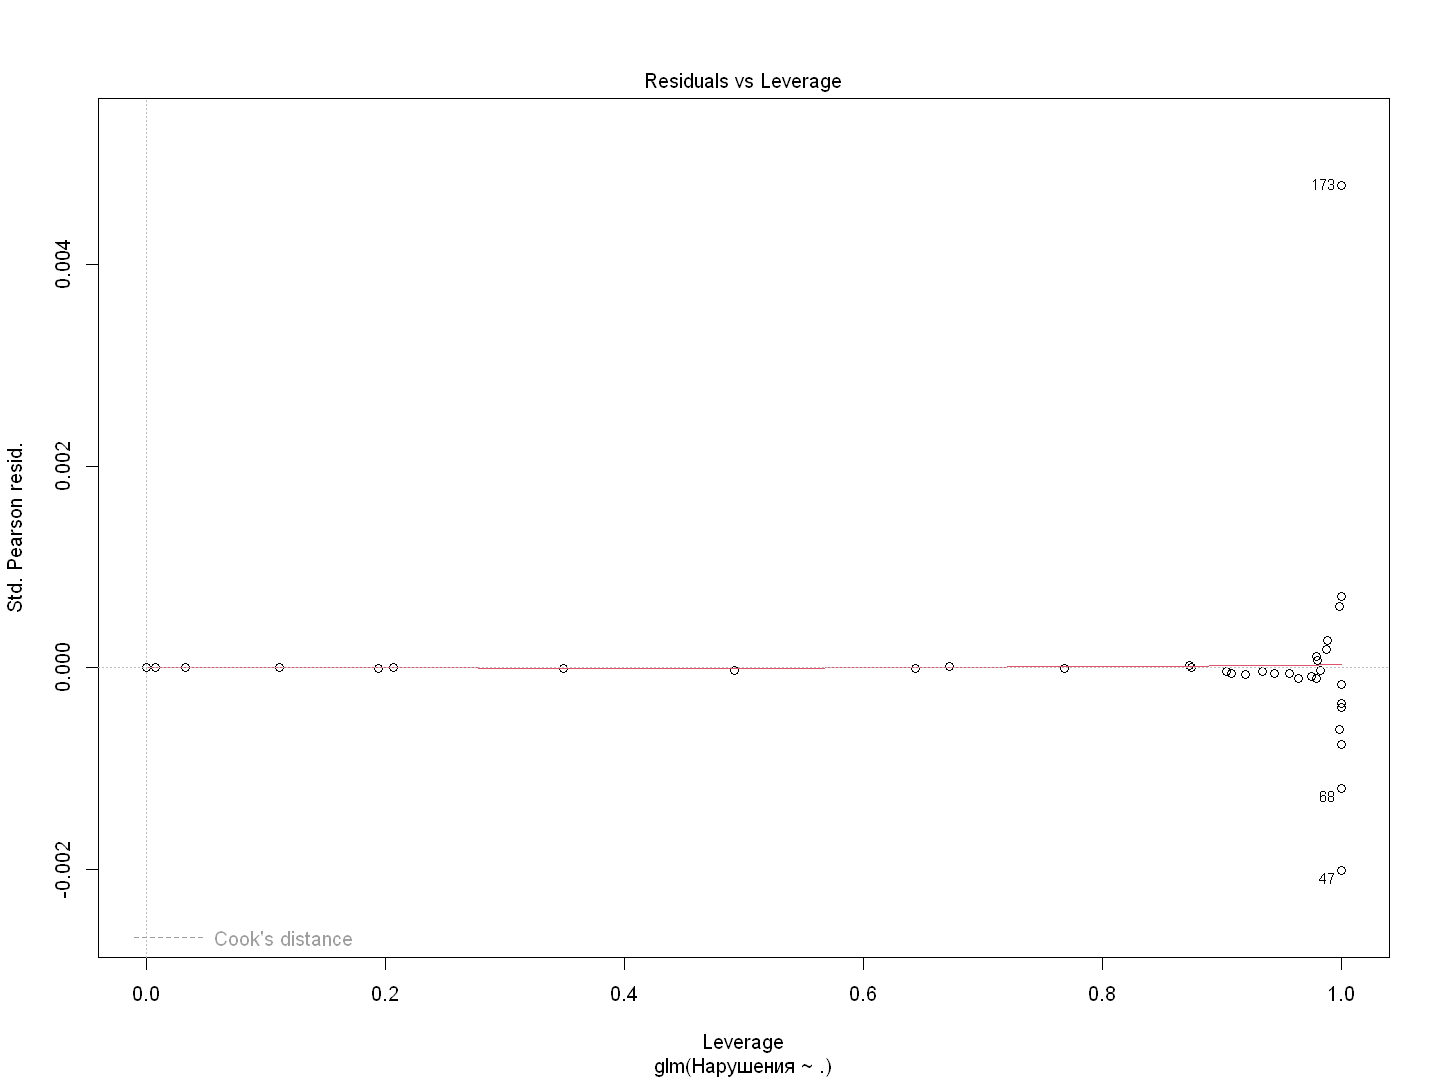

In [43]:
plot(prem.model)

### Предсказанные значения
Полученная модель (*prem.model*) была применена к тестовой выборке (20% от общего количества). 

In [44]:
model_predict = predict(prem.model, newdata=subset(test, select=c(1:12)), type="response")
test$prob = model_predict
test$predict = ifelse(test$prob>=0.5, 1, 0)
model_prediction = prediction(model_predict, as.integer(test$Нарушения) - 1)

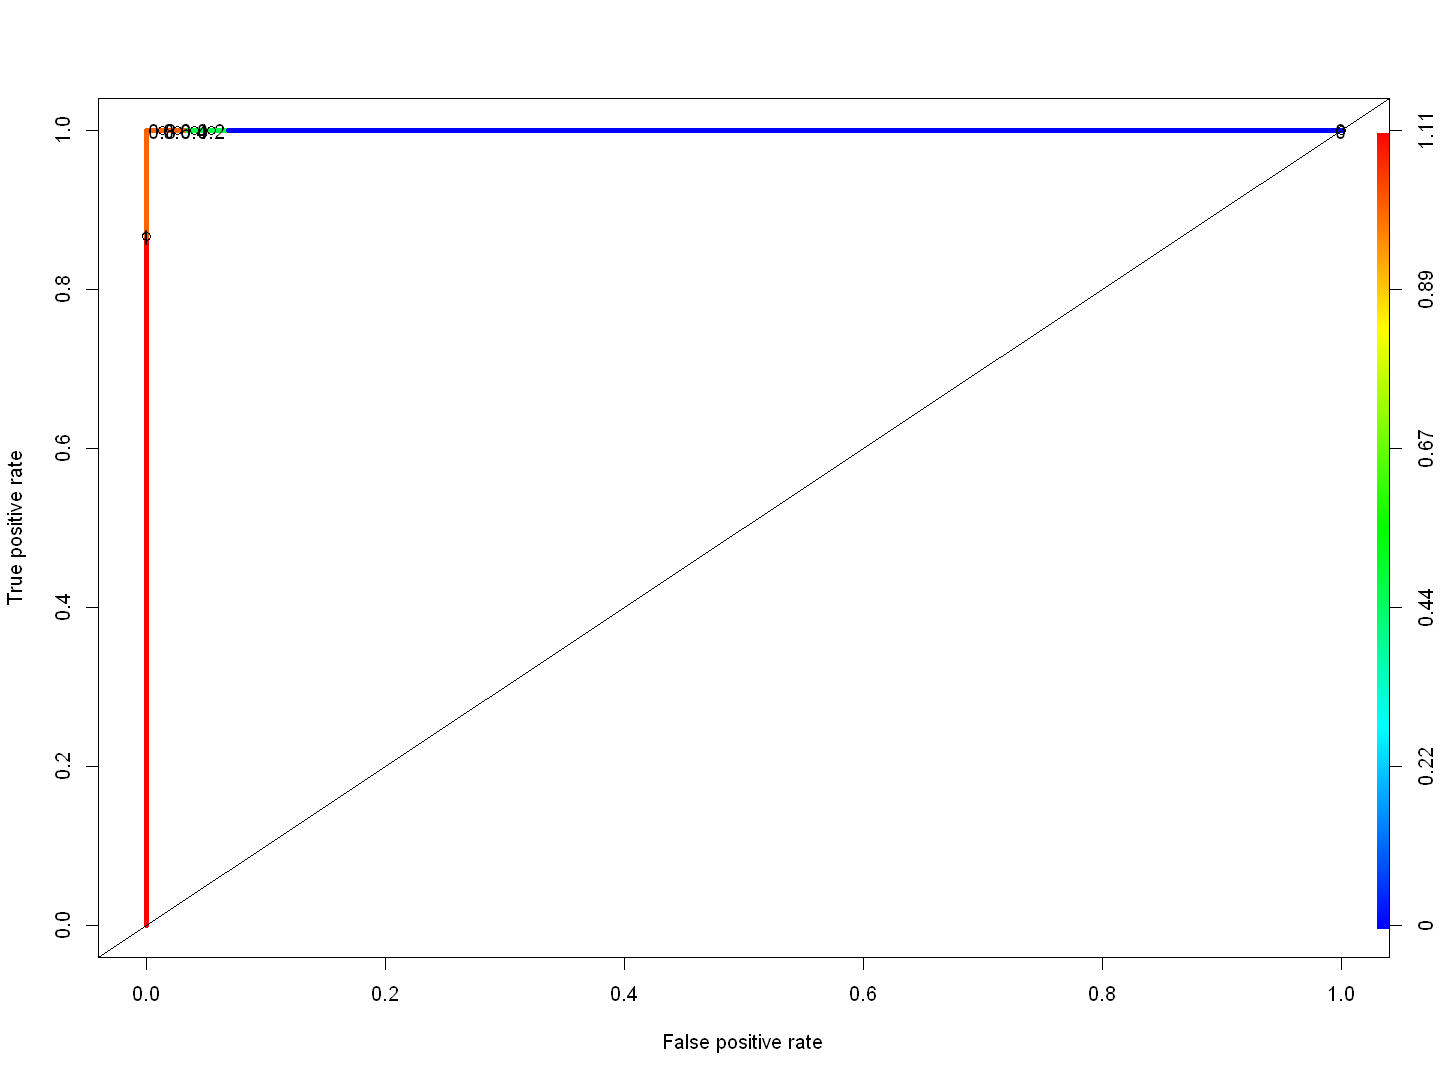

In [45]:
roc_curve = performance(model_prediction, measure='tpr', x.measure='fpr')
plot(roc_curve, colorize=TRUE, print.cutoffs.at=seq(0, 1, by=0.2), lwd=4)
abline(0, 1)

In [46]:
auc = performance(model_prediction, measure='auc')
auc
auc@y.values[[1]]
auc(roc(test$Нарушения, test$predict))

A performance instance
  'Area under the ROC curve'

[1] 1

Setting levels: control = НН, case = БНН

Setting direction: controls < cases



Area under the curve: 1

In [47]:
# confint(prem.model)
cbind(as.data.frame(coef(prem.model)), confint.default(prem.model), exp(coef(prem.model)))

,coef(prem.model),2.5 %,97.5 %,exp(coef(prem.model))
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-150.078525,-595617.67,595317.52,6.633222e-66
Гестация(28; 31],3.997207,-271377.31,271385.30,5.444588e+01
Гестация(31; 33],44.842531,-175227.21,175316.90,2.984446e+19
Гестация(33; 36],21.944209,-211434.45,211478.34,3.390383e+09
Асфиксияда,17.592531,-261146.29,261181.47,4.368570e+07
"ИВЛ1[1,7)",-43.201019,-74837.42,74751.01,1.729959e-19
"ИВЛ1[7,14)",-19.476342,-326674.00,326635.05,3.479624e-09
"ИВЛ1[14,21)",-46.661442,-354979.69,354886.37,5.434919e-21
"ИВЛ1[21,30)",-31.982100,-1213207.20,1213143.24,1.289290e-14


In [48]:
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 2:4) # гестация
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 6:10) # ИВЛ
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 11:12) # АСН
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 13:14) # ВУИ.сепсис
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 16:18) # ДН.степень
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 20:21) # БВ
# wald.test(b = coef(prem.model), Sigma = vcov(prem.model), Terms = 23:25) # Рефлексы

In [49]:
table(test$predict, test$Нарушения)

   
    НН БНН
  0 29   0
  1  0  15

#### График регрессии

`geom_smooth()` using formula = 'y ~ x'
Warning message in eval(family$initialize):
"не целочисленные #successes в binomial glm!"
Warning message:
"glm.fit: возникли подогнанные вероятности 0 или 1"


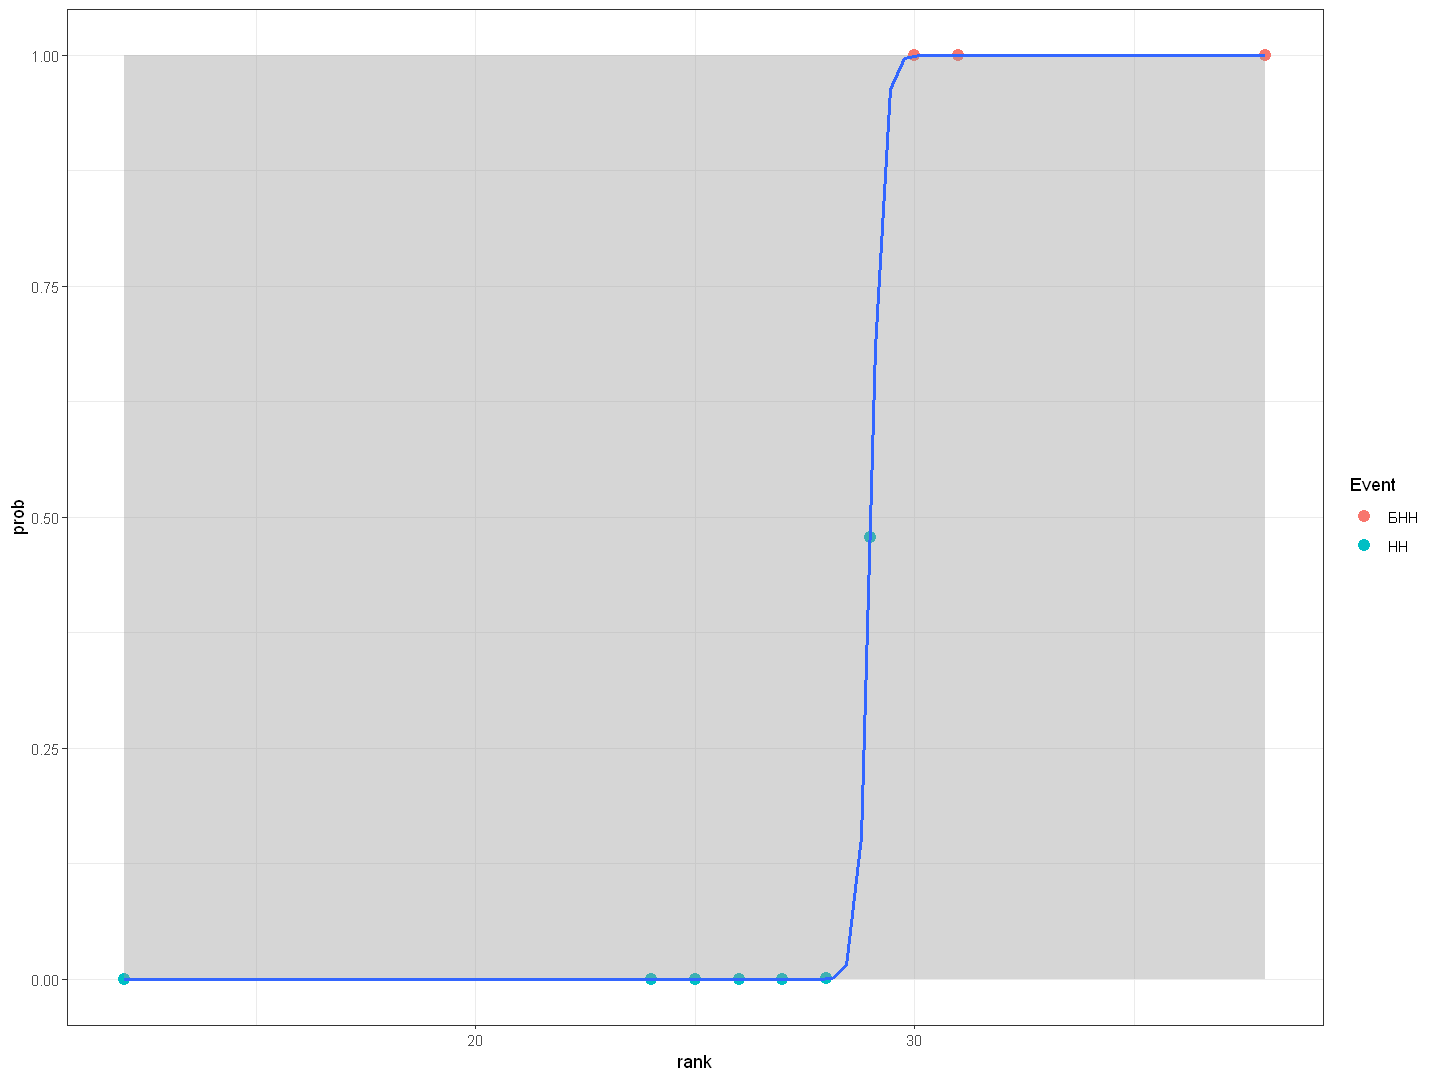

In [50]:
test %>% 
    arrange(prob) %>% 
    mutate(rank=rank(prob), Event=ifelse(prob>=0.5, 'БНН', 'НН')) %>% 
        ggplot(aes(rank, prob))+
        geom_point(aes(color=Event), size=3)+
        geom_smooth(method = "glm"
                    , method.args = list(family = "binomial")
                   ) +
        theme_bw()

In [51]:
# prem.test = data.frame(Гестация=rep(levels(prem$Гестация), nlevels(prem$Абилитация))
#                        , Асфиксия="нет"
#                        , ИВЛ1="нет"
#                        , АСН7="нет"
#                        , ВУИ.сепсис="нет"
#                        , СЭИ="нет"
#                        , ДН.степень="нет"
#                        , ПВК.степень=0
#                        , ЭФПН="нет"
#                        , БВ="нет"
#                        , Абилитация=rep(levels(prem$Абилитация), each=nlevels(prem$Гестация))
#                        , Рефлексы="соответствуют"
#                        )
# prem.test1 = cbind(prem.test, predict(prem.model, newdata=prem.test, type="link", se=TRUE))
# prem.test2 = within(prem.test1, {
#                             PredictedProb <- plogis(fit)
#                             LL <- plogis(fit - (1.96 * se.fit))
#                             UL <- plogis(fit + (1.96 * se.fit))
#                             }
#                   )
# prem.test2$Гестация = (factor(prem.test2$Гестация))
# prem.test2$Абилитация = factor(prem.test2$Абилитация)
# prem.test2
# ggplot(prem.test2
#        , aes(x = Гестация, y = PredictedProb)
#       ) + 
#     geom_ribbon(aes(ymin = LL
#                     , ymax = UL
#                     , fill = rank
#                    )
#                 , alpha = 0.2
#                ) + 
#     geom_line(aes(colour = rank), linewidth = 1)

#### Соответствие

In [52]:
actual = as.numeric(test$Нарушения) - 1
#confusionMatrix(actual, model_predict)

#### Чувствительность, специфичность, ошибочная классификация

In [53]:
# actual = as.numeric(test$Нарушения) - 1
# cat('Чувствительность: ', sensitivity(actual, model_predict), '\n')
# cat('Специфичность: ', specificity(actual, model_predict), '\n')
# missclassification = misClassError(actual, model_predict, '\n') #, threshold=prem.optimal)
# cat('Ошибки классификации: ', missclassification, '\n')
# cat('Точность: ',1-missclassification)
# actual

In [54]:
# try(plotROC(as.numeric(test$Нарушения)-1, model_predict))

## МЛ

Нарушения - Абилитация 

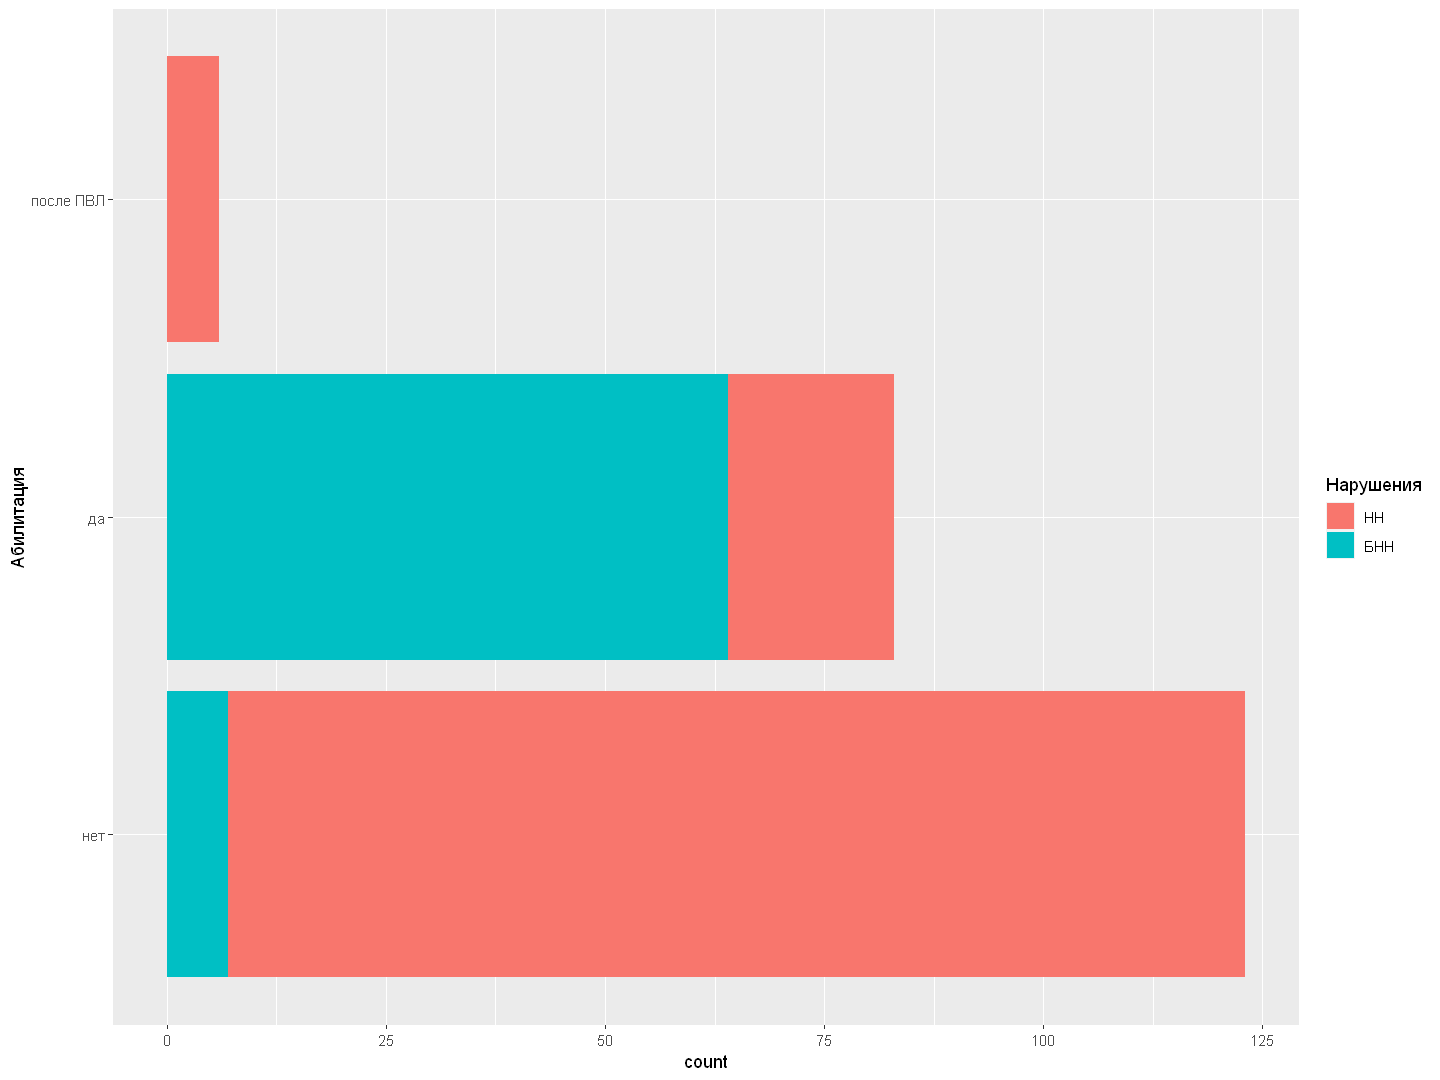

In [55]:
ggplot(prem, aes(Абилитация, fill = Нарушения)) +
    geom_bar() +
    coord_flip()

### Получение обучающей и тестовой выборок
Исходные данные делятся в соотношении 80% (обучающая выборка) к 20% (тестовая выборка).

In [56]:
set.seed(421)
split = initial_split(prem, prop = 0.8, strata = Нарушения)
train = split %>% 
        training()
test = split %>% 
        testing()

### Тренировка модели логистической регрессии
Используется glmnet для задачи классификации.
- penalty -- степень регуляризации
- mixture -- регуляризация эластичной сети: 1 -- Lasso модель, 2 -- ridge модель, (0; 1) -- модель эластичной сети 

In [57]:
model = logistic_reg(mixture = double(1), penalty = double(1)) %>%
  set_engine("glmnet") %>%
  set_mode("classification") %>%
  fit(Нарушения ~ ., data = train)

### Результаты модели
Коэффициенты факторов

In [58]:
tidy(model)

Warning message:
"пакет 'glmnet' был собран под R версии 4.2.3"
Loaded glmnet 4.1-7



term,estimate,penalty
<chr>,<dbl>,<dbl>
(Intercept),-0.883289110,0
Гестация(28; 31],0.229951154,0
Гестация(31; 33],-0.204270171,0
Гестация(33; 36],0.553350054,0
Асфиксияда,0.404650321,0
"ИВЛ1[1,7)",-0.239441455,0
"ИВЛ1[7,14)",-0.718628554,0
"ИВЛ1[14,21)",-0.270816949,0
"ИВЛ1[21,30)",-1.086792306,0


Точность

In [59]:
# Class Predictions
pred_class = predict(model,
                      new_data = test,
                      type = "class")
# Class Probabilities
pred_proba = predict(model,
                      new_data = test,
                      type = "prob")

results = test %>%
           select(Нарушения) %>%
           bind_cols(pred_class, pred_proba)
accuracy(results, truth = Нарушения, estimate = .pred_class)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9318182


### Оптимизация параметров

In [60]:
# Define the logistic regression model with penalty and mixture hyperparameters
log_reg = logistic_reg(mixture = tune(), penalty = tune(), engine = "glmnet")

In [61]:
# Define the grid of possible values for mixture and penalty (hyperparameters) search
grid = grid_regular(mixture(), penalty(), levels = c(mixture = 4, penalty = 3))

In [62]:
# Define the workflow for the model (an object to store the model details)
log_reg_wf = workflow() %>%
  add_model(log_reg) %>%
  add_formula(Нарушения ~ .)

In [63]:
# Define the resampling method for the grid search
folds = vfold_cv(train, v = 5)

In [64]:
# Tune the hyperparameters using the grid search
log_reg_tuned = tune_grid(
    log_reg_wf
    , resamples = folds
    , grid = grid
    , control = control_grid(save_pred = TRUE)
)

tuned.model = select_best(log_reg_tuned, metric = "roc_auc")
tuned.penalty = tuned.model$penalty
tuned.mixture = tuned.model$mixture
tuned.model

penalty,mixture,.config
<dbl>,<dbl>,<chr>
1e-10,0.6666667,Preprocessor1_Model07


### Моделирование на обучающей выборке

In [65]:
# Fit the model using the optimal hyperparameters
log_reg_final = logistic_reg(penalty = tuned.penalty, mixture = tuned.mixture) %>%
                 set_engine("glmnet") %>%
                 set_mode("classification") %>%
                 fit(Нарушения~., data = train)

In [66]:
# Evaluate the model performance on the testing set
head(test)
pred_class = predict(log_reg_final,
                      new_data = test,
                      type = "class")
results = test %>%
  select(Нарушения) %>%
  bind_cols(pred_class, pred_proba)
head(results)

,Гестация,Асфиксия,ИВЛ1,АСН7,ВУИ.сепсис,СЭИ,ДН.степень,ПВК.степень,ЭФПН,БВ,Абилитация,Рефлексы,Нарушения
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
1,(31; 33],нет,нет,нет,ВУИ,нет,1,1,нет,СПП,нет,повышеные,НН
2,[22; 28],нет,"[30,66]",да,ВУИ,да,3,1,нет,СПП,нет,угнетение ЦНС,НН
3,(33; 36],да,нет,да,ВУИ,нет,1,2,нет,СПП,нет,повышеные,НН
7,(31; 33],нет,нет,нет,ВУИ,нет,1,2,нет,СПП,нет,повышеные,НН
10,(33; 36],да,"[1,7)",нет,ВУИ,да,1,2,нет,СПП,нет,повышеные,НН
11,(28; 31],да,"[1,7)",да,ВУИ,нет,2,1,нет,СПП,нет,повышеные,НН


,Нарушения,.pred_class,.pred_НН,.pred_БНН
,<fct>,<fct>,<dbl>,<dbl>
1,НН,НН,0.8603960,0.139604006
2,НН,НН,0.9925663,0.007433731
3,НН,НН,0.7906331,0.209366926
4,НН,НН,0.9330990,0.066901043
5,НН,НН,0.8464749,0.153525129
6,НН,НН,0.6331157,0.366884265


In [76]:
head(test)

,Гестация,Асфиксия,ИВЛ1,АСН7,ВУИ.сепсис,СЭИ,ДН.степень,ПВК.степень,ЭФПН,БВ,Абилитация,Рефлексы,Нарушения
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
1,(31; 33],нет,нет,нет,ВУИ,нет,1,1,нет,СПП,нет,повышеные,НН
2,[22; 28],нет,"[30,66]",да,ВУИ,да,3,1,нет,СПП,нет,угнетение ЦНС,НН
3,(33; 36],да,нет,да,ВУИ,нет,1,2,нет,СПП,нет,повышеные,НН
7,(31; 33],нет,нет,нет,ВУИ,нет,1,2,нет,СПП,нет,повышеные,НН
10,(33; 36],да,"[1,7)",нет,ВУИ,да,1,2,нет,СПП,нет,повышеные,НН
11,(28; 31],да,"[1,7)",да,ВУИ,нет,2,1,нет,СПП,нет,повышеные,НН


### Результаты моделирования

* Accruracy -- количество правильно предсказанных (положительных и отрицательных) оценок по отношению к общему количеству
* Precision (PV+, PV-) -- доля корректно предсказанных оценок указанного класса по отношению к общему количеству данного класса
* Recall (чувстивительность, специфичность) -- доля корректно предсказанных оценок указанного класса по отношению к общему количеству данного класса
* F-1 (F1) -- гармоническое среднее precision и recall

|Метрика|Определение|Формула|Синоним|
|-----|-----------|-------|--------|
|порог|пороговое значение|-|-|
|tn|Истинно отрицательное количество|-|-|
|tp|Истинно положительное количество|-|-|
|fn|Ложно отрицательное количество|-|-|
|fp|Ложно положительное количество|-|-|
|specificity|чувствительность|tn / (tn + fp)|tnr|
|sensitivity|специфичность|tp / (tp + fn)|recall, tpr|
|accuracy|точность|(tp + tn) / N|-|
|npv|Отрицательное предсказанное значение|tn / (tn + fn)|PV-|
|ppv|Положительное предсказанное значение|tp / (tp + fp)|precision, PV+|
|precision|точность|tp / (tp + fp)|ppv|
|recall|Recall|tp / (tp + fn)|sensitivity, tpr|
|tpr|частота истинно положительных исходов|tp / (tp + fn)|sensitivity, recall|
|fpr|частота ложно положительных исходов|fp / (tn + fp)|1-specificity|
|tnr|частота истинно отрицательных исходов|tn / (tn + fp)|specificity|
|fnr|частота ложно отрицательных исходов|fn / (tp + fn)|1-sensitivity|
|fdr|False Discovery Rate|fp / (tp + fp)|1-ppv|
|youden|индекс Youden|se + r * sp|-|

In [67]:
actual = as.numeric(results$Нарушения) - 1
modeled = as.numeric(results$.pred_class) - 1
caret::confusionMatrix(table(actual, modeled))

Confusion Matrix and Statistics

      modeled
actual  0  1
     0 29  0
     1  0 15
                                     
               Accuracy : 1          
                 95% CI : (0.9196, 1)
    No Information Rate : 0.6591     
    P-Value [Acc > NIR] : 1.08e-08   
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6591     
         Detection Rate : 0.6591     
   Detection Prevalence : 0.6591     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     

### Факторы, влияющие на исход

In [68]:
coeff = tidy(log_reg_final) %>% 
    arrange(desc(abs(estimate))) %>% 
    filter(abs(estimate) > 0.5)
coeff

term,estimate,penalty
<chr>,<dbl>,<dbl>
БВСПП,-25.035516,1e-10
Абилитацияда,24.124127,1e-10
БВПВЛ,-23.054057,1e-10
"ИВЛ1[30,66]",-11.355527,1e-10
Рефлексывысокие,-10.816847,1e-10
"ИВЛ1[14,21)",-9.470269,1e-10
АСН7да,7.024025,1e-10
"ИВЛ1[1,7)",-6.630710,1e-10
Гестация(31; 33],6.270845,1e-10


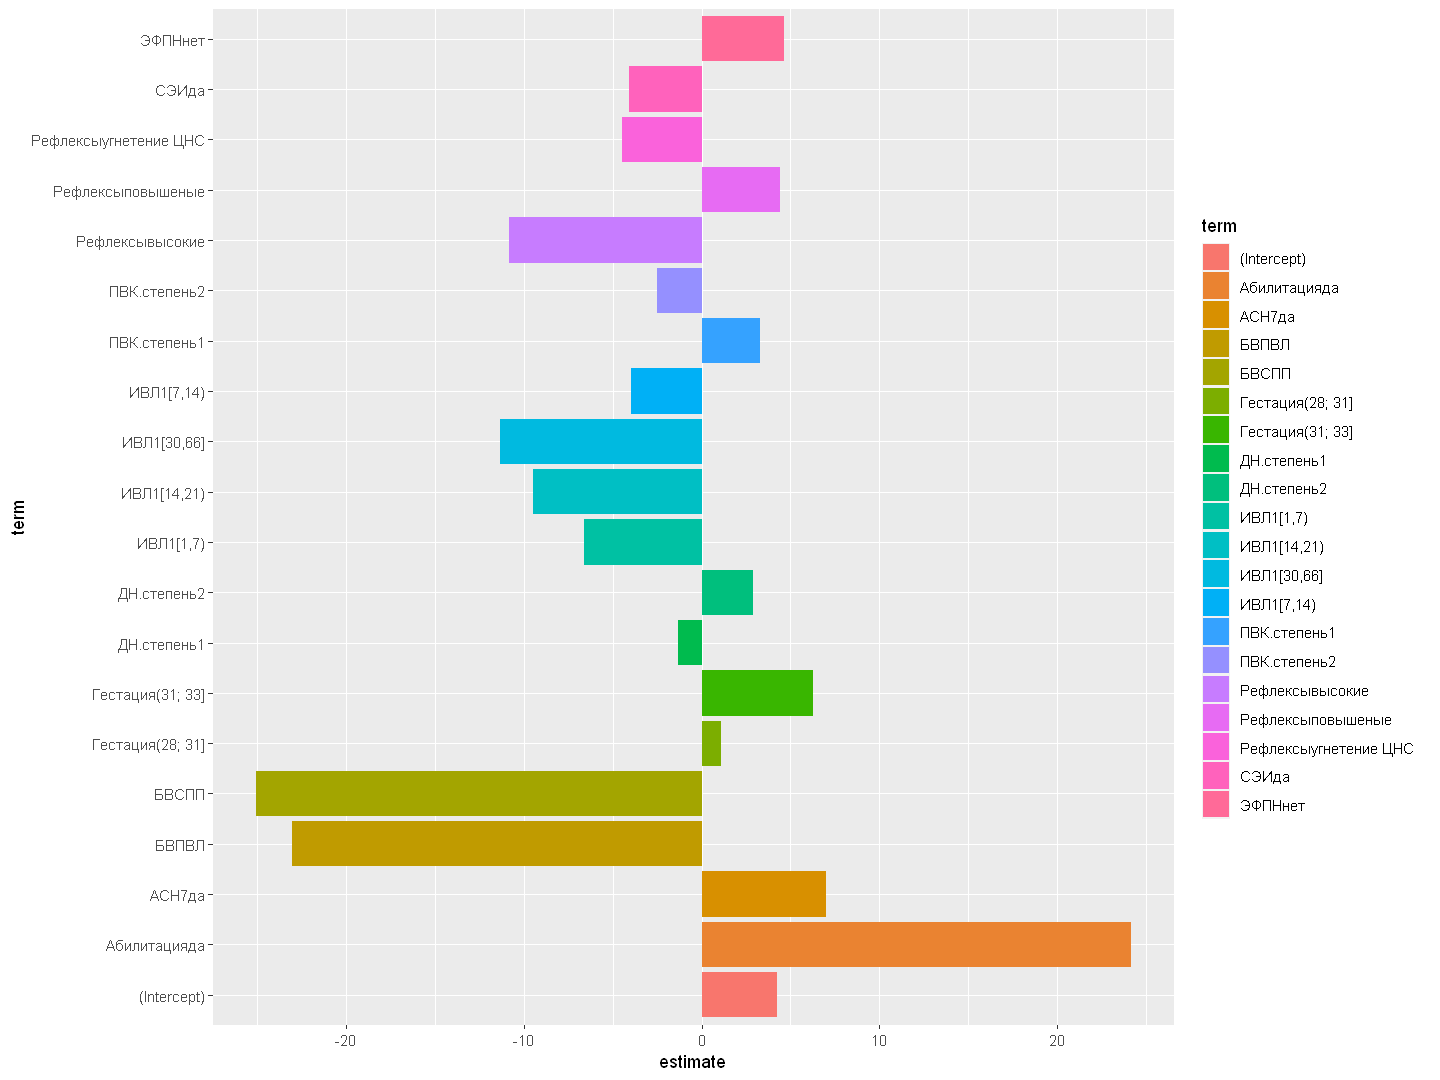

In [69]:
ggplot(coeff
       , aes(x = term
             , y = estimate
             , fill = term
            )
      ) + 
geom_col() + 
coord_flip()

In [70]:
# Summarize model
# summary(gam.model )

In [71]:
# # Make predictions
# probabilities <- gam.model %>% predict(test.data, type = "response")
# predicted.classes <- ifelse(probabilities> 0.5, "pos", "neg")
# # Model Accuracy
# mean(predicted.classes == test.data$diabetes)

## Сохранение модели

In [77]:
#getwd()
#saveRDS(log_reg_final, file = 'G:/GIT/prematures/scripts/model_final.model')
saveRDS(model, file = 'G:/GIT/prematures/scripts/model_final.model')

# Карта случаев

In [73]:
library(leaflet)

Warning message:
"пакет 'leaflet' был собран под R версии 4.2.3"

Присоединяю пакет: 'leaflet'


Следующий объект скрыт от 'package:xts':

    addLegend




In [74]:
prem.map = prem0[!is.na(prem0$lat), ]

In [75]:
m = leaflet() %>% 
    # addProviderTiles("OpenStreetMap") %>%
    setView(27.9534, 53.7098, zoom = 6) %>% 
    addTiles()
cols = c("blue", "red")
m = addCircleMarkers(m
                    , lng = as.numeric(prem.map$lng), lat = as.numeric(prem.map$lat)
                    , radius = as.integer(factor(prem.map$Гестация)) + 1
                    , color = cols[as.integer(factor(prem.map$Пол))]
                    , popup = paste('Нарушения 2:', prem.map$Нарушения.2, " Гестация:", prem.map$Гестация)
                    )
m = addLegend(m
            , "topright"
            , colors = cols
            , labels = c('мальчики', 'девочки')
            , title = "Пол"
            , opacity = 0.3
             )
m

Warning message in validateCoords(lng, lat, funcName):
"Data contains 105 rows with either missing or invalid lat/lon values and will be ignored"


HTML widgets cannot be represented in plain text (need html)